In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import nglview as nv
from protein.model_analysis import get_predicted_transformations, pca_latent_space, mask_evolution, plot_loss
from protein.main import rotate_residues, rotate_domain_pdb_structure_matrix, translate_residues, translate_domain_pdb_structure
from pytorch3d.transforms import matrix_to_axis_angle, axis_angle_to_matrix
from Bio.PDB import PDBParser
from Bio.PDB import PDBIO

In [537]:
mask = np.load("data/mask2431.npy")
mask = np.argmax(mask, axis=1)
np.sum(mask==0)

295

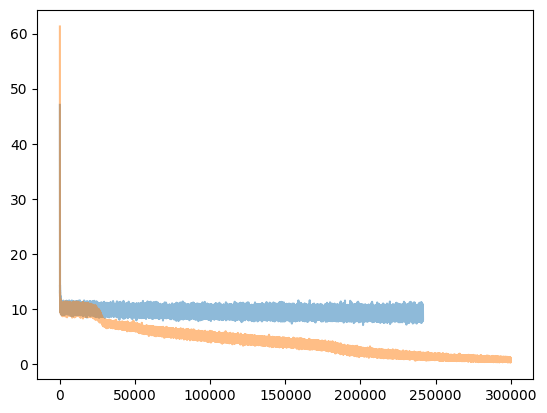

In [65]:
#losses_rmsd = np.load("data/losses_rmsdTEST.npy")
start = 0
end = 300000
#losses_rmsdDeeperAgain = np.load("data/losses_rmsdDeeperAgain.npy")
losses_rmsd = np.load("data/losses_rmsd.npy")
losses_rmsdold = np.load("data/losses_old_rmsd.npy")
#plt.plot(loss[start:])
#plt.plot(np.concatenate([lossCheckpoint1, lossCheckpoint2])[start:700000], alpha=0.5)
plt.plot(losses_rmsd[start:end], alpha=0.5)
plt.plot(losses_rmsdold[start:end], alpha=0.5)
plt.show()

In [8]:
len(losses_rmsdDeeper)/100

3286.0

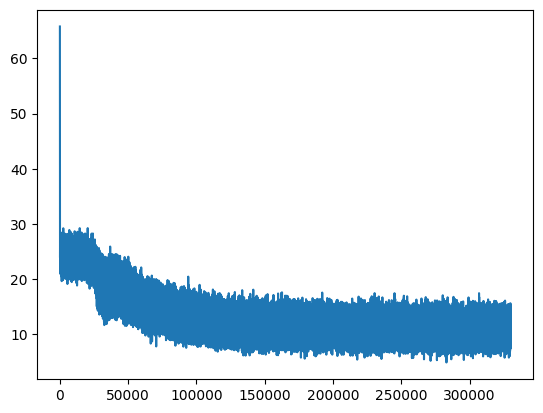

In [111]:
plt.plot(losses_rmsdFollowing)

In [129]:
len(losses_rmsdDeeper)/100

179.0

In [112]:
len(losses_rmsdAgain)/100

3301.0

In [114]:
len(losses_rmsdFollowing)/100

3301.0

In [ ]:
300000/1000

In [ ]:
mask = np.load("data/mask1998.npy")
mask = np.argmax(mask, axis = 1)
np.sum(mask == 0)

In [2]:
def transform_pdb(path_in, path_out, predicted_rotations, local_frame_in_columns):
    parser = PDBParser()
    pdb_structure = parser.get_structure("1", path_in)
    rotate_residues(pdb_structure, predicted_rotations, local_frame_in_columns)
    io = PDBIO()
    io.set_structure(pdb_structure)
    io.save(path_out)
    
def rotate_domain_pdb(path_in, path_out, start_residue, end_residue, rotation_matrix, local_frame_in_columns):
    parser = PDBParser()
    pdb_structure = parser.get_structure("1", path_in)
    rotate_domain_pdb_structure_matrix(pdb_structure, start_residue, end_residue, rotation_matrix, local_frame_in_columns)
    io = PDBIO()
    io.set_structure(pdb_structure)
    io.save(path_out)
    
def translate_residues_pdb(path_in, path_out, translations):
    parser = PDBParser()
    pdb_structure = parser.get_structure("1", path_in)
    translate_residues(pdb_structure, translations)
    io = PDBIO()
    io.set_structure(pdb_structure)
    io.save(path_out)

In [3]:
data_path = "data/imagesGMMRotationsPresentationContinuous/"
training_axis = torch.load(data_path + "training_rotations_axis.npy", map_location=torch.device('cpu'))
training_angles = torch.load(data_path + "training_rotations_angles.npy", map_location=torch.device('cpu'))
training_indexes = torch.tensor(np.array([i for i in range(10000)]))

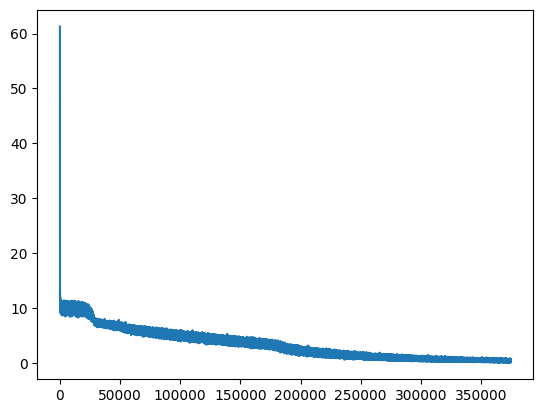

In [4]:
start = 0
loss = np.load(data_path + "losses_rmsd.npy")
#plt.plot(loss[start:])
loss_new = np.load("losses_rmsd.npy")
loss_new_following = np.load("losses_rmsd_following.npy")
loss_new_followingAgain = np.load("losses_rmsd_followingAgain.npy")
plt.plot(loss)
plt.show()
#plt.plot(np.concatenate([loss_new[start:], loss_new_following, loss_new_followingAgain]), alpha=0.5)
#plt.axhline(y=2, color="red")
#plt.axhline(y=1.45, color="red")
#plt.axhline(y=1.35, color="red")
#plt.axhline(y=4.2, color="red")
#plt.axhline(y=4, color="red")

In [5]:
len(loss_new_followingAgain)/100

369.0

In [6]:
len(loss_new)/100

4998.0

In [7]:
200000/100

2000.0

In [8]:
mask_evol = mask_evolution(data_path)

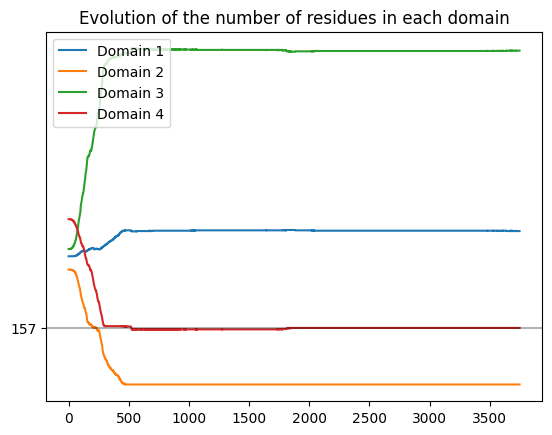

In [9]:
plt.plot(mask_evol[:, 0], label="Domain 1")
plt.plot(mask_evol[:, 1], label="Domain 2")
plt.plot(mask_evol[:, 2], label="Domain 3")
plt.plot(mask_evol[:, 3], label="Domain 4")
plt.axhline(y=157, alpha=0.3, color="black")
plt.yticks([157])
plt.legend(loc="upper left")
plt.title("Evolution of the number of residues in each domain")
plt.savefig(data_path + "evolution_mask.png")
plt.show()

In [10]:
data_path

'data/imagesGMMRotationsPresentationContinuous/'

In [11]:
model = torch.load(data_path + "full_model", map_location=torch.device('cpu'))

In [12]:
pca_latent = pca_latent_space(model)

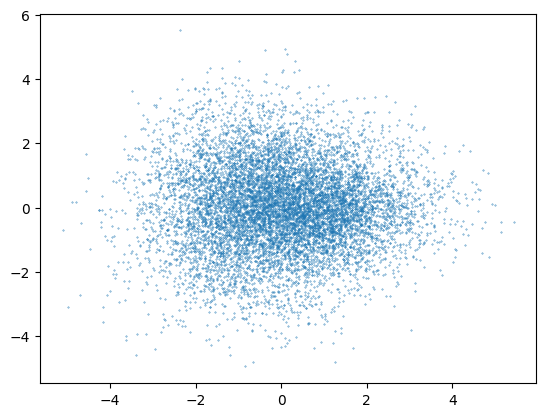

In [13]:
plt.scatter(pca_latent[:, 0], pca_latent[:, 1], s=0.1)

In [14]:
model.device = "cpu"
model.batch_size = 1000
new_structure, predicted_translations, predicted_rotations = get_predicted_transformations(model, training_indexes[:1000], training_angles[:1000], training_axis
                                                                       [:1000])

In [15]:
predicted_rotations

tensor([[[[ 1.0000e+00, -2.9081e-04, -1.6386e-04],
          [ 2.9083e-04,  1.0000e+00,  1.2935e-04],
          [ 1.6382e-04, -1.2940e-04,  1.0000e+00]],

         [[ 1.0000e+00, -2.9081e-04, -1.6386e-04],
          [ 2.9083e-04,  1.0000e+00,  1.2935e-04],
          [ 1.6382e-04, -1.2940e-04,  1.0000e+00]],

         [[ 1.0000e+00, -2.9081e-04, -1.6386e-04],
          [ 2.9083e-04,  1.0000e+00,  1.2935e-04],
          [ 1.6382e-04, -1.2940e-04,  1.0000e+00]],

         ...,

         [[ 1.6335e-01, -1.0669e-03, -9.8657e-01],
          [-6.5287e-04,  1.0000e+00, -1.1896e-03],
          [ 9.8657e-01,  8.3842e-04,  1.6335e-01]],

         [[ 1.6335e-01, -1.0669e-03, -9.8657e-01],
          [-6.5287e-04,  1.0000e+00, -1.1896e-03],
          [ 9.8657e-01,  8.3842e-04,  1.6335e-01]],

         [[ 1.6335e-01, -1.0669e-03, -9.8657e-01],
          [-6.5287e-04,  1.0000e+00, -1.1896e-03],
          [ 9.8657e-01,  8.3842e-04,  1.6335e-01]]],


        [[[ 1.0000e+00, -2.2801e-04, -3.1416e-04],
  

In [16]:
axis_angle_predicted = matrix_to_axis_angle(predicted_rotations[:, :, :, :])
angles_predicted = torch.sqrt(torch.sum(axis_angle_predicted**2, axis=-1))
axis_predicted = (axis_angle_predicted/angles_predicted[:, :, None])
predicted_rotations = predicted_rotations.detach().numpy()

clean_axis_predicted = axis_predicted
clean_angles_predicted = angles_predicted
clean_angles_predicted[axis_predicted[:, :, 1] < 0] = -angles_predicted[axis_predicted[:, :, 1] < 0]
clean_axis_predicted[axis_predicted[:, :, 1] < 0] = -axis_predicted[axis_predicted[:, :, 1] < 0]
clean_angles_predicted[clean_angles_predicted >= np.pi] = clean_angles_predicted[clean_angles_predicted >= np.pi] - 2*torch.pi
clean_angles_predicted = clean_angles_predicted.detach().numpy()
clean_axis_predicted = clean_axis_predicted.detach().numpy()

In [17]:
clean_angles_predicted[0]

array([-3.5798777e-04, -3.5798777e-04, -3.5798777e-04, ...,
       -1.4067130e+00, -1.4067130e+00, -1.4067130e+00], dtype=float32)

In [18]:
proportions = torch.softmax(model.cluster_proportions, dim=1)
#proportions = torch.ones((1,4))/4
log_num = -0.5*(model.residues - model.cluster_means)**2/model.cluster_std**2 + \
      torch.log(proportions)

mask = torch.softmax(log_num/1, dim=1)
print(mask)

tensor([[1.0000e+00, 3.2414e-08, 1.6626e-11, 1.8056e-30],
        [1.0000e+00, 3.3815e-08, 1.7608e-11, 1.9460e-30],
        [1.0000e+00, 3.5275e-08, 1.8648e-11, 2.0974e-30],
        ...,
        [7.1995e-33, 9.2314e-18, 5.2027e-04, 9.9948e-01],
        [6.4224e-33, 8.4582e-18, 4.9467e-04, 9.9951e-01],
        [5.7290e-33, 7.7494e-18, 4.7031e-04, 9.9953e-01]],
       grad_fn=<SoftmaxBackward0>)


In [19]:
#model.device = "cpu"
#latent_variables = model.sample_latent(training_indexes[:100])
#features = torch.cat([latent_variables, training_angles[:100], training_axis[:100]], dim=1)
#output = model.decoder.forward(features)

In [20]:
#output = torch.reshape(output, (batch_size, model.N_domains, 2 * 3))
#scalars_per_domain = output[:, :, :3]

In [21]:
#translation_vectors = torch.matmul(scalars_per_domain, model.local_frame)

In [22]:
rotation_matrices = torch.load(data_path + "training_conformation_rotation_matrices.npy", map_location=torch.device('cpu'))
axis_angle = matrix_to_axis_angle(rotation_matrices)
angles = torch.sqrt(torch.sum(axis_angle**2, axis=-1))
axis = (axis_angle/angles[:, :, None])[:, 2, :]
rotation_matrices = rotation_matrices.detach().numpy()

clean_angles = angles
clean_axis = axis
clean_angles[axis[:, 1] < 0] = -angles[axis[:, 1] < 0]
clean_axis[axis[:, 1] < 0] = -axis[axis[:, 1] < 0]
clean_angles[clean_angles >=np.pi] = clean_angles[clean_angles >=np.pi] - 2*torch.pi
clean_angles = clean_angles.detach().numpy()
clean_axis = clean_axis

In [23]:
angles[10, 2]

tensor(-2.2882)

In [24]:
-1.6188/np.pi

-0.5152800437543203

In [25]:
-2.3690/np.pi

-0.7540761203694002

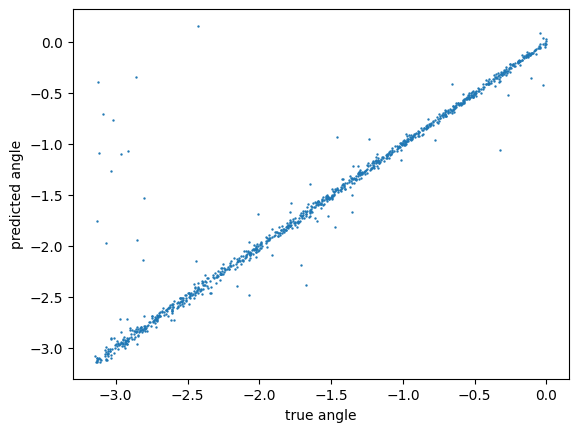

In [28]:
not_outlier = clean_angles_predicted[:, -100] < 0.5
plt.scatter(clean_angles[:1000, 2][not_outlier], clean_angles_predicted[:, -100][not_outlier], s=0.5)
plt.xlabel("true angle")
plt.ylabel("predicted angle")
plt.savefig(data_path + "comparison_angles.png")
plt.show()

In [29]:
relative_err = np.abs((clean_angles[:1000, 2] - clean_angles_predicted[:, -100]))

In [31]:
relative_err = np.abs((clean_angles[:1000, 2] - clean_angles_predicted[:, -100])/clean_angles[:1000, 2])

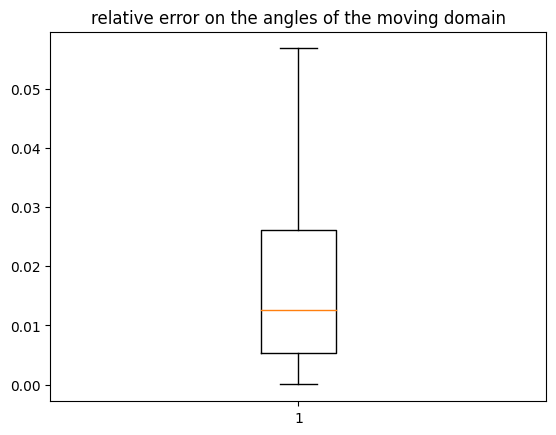

In [85]:
plt.boxplot(relative_err, showfliers=False)
plt.title("relative error on the angles of the moving domain")
plt.savefig(data_path + "relative_error_boxplot.png")
plt.show()

In [35]:
clean_axis_predicted.shape

(1000, 1510, 3)

In [40]:
clean_axis

tensor([[-0., 1., -0.],
        [-0., 1., -0.],
        [-0., 1., -0.],
        ...,
        [0., 1., 0.],
        [-0., 1., -0.],
        [-0., 1., -0.]])

In [46]:
rmsd_axis = np.sqrt(np.sum((clean_axis_predicted[:, -157:] - clean_axis[:1000, None, :].detach().numpy())**2, axis=-1))

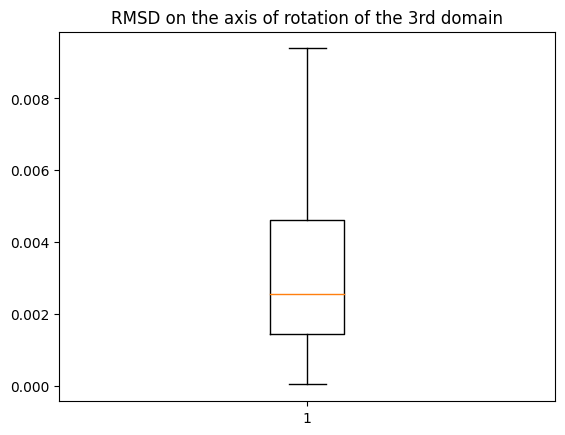

In [53]:
plt.boxplot(rmsd_axis.flatten(), showfliers=False)
plt.title("RMSD on the axis of rotation of the 3rd domain")
plt.savefig(data_path + "rmsd_axis.png")
plt.show()


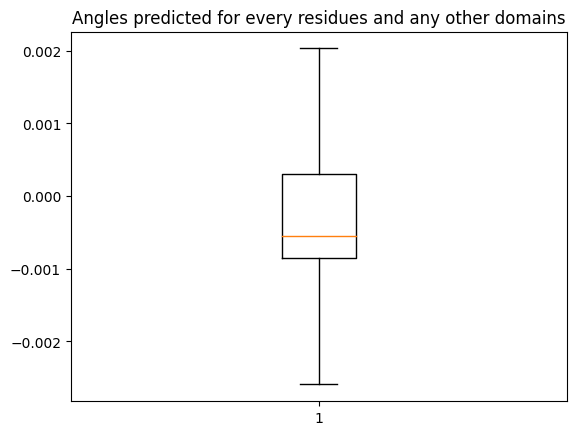

In [83]:
plt.boxplot(angles_predicted[:1353].flatten().detach().numpy(), showfliers=False)
plt.title("Angles predicted for every residues and any other domains")
plt.savefig(data_path + "angles_predicted_other_domains.png")
plt.show()

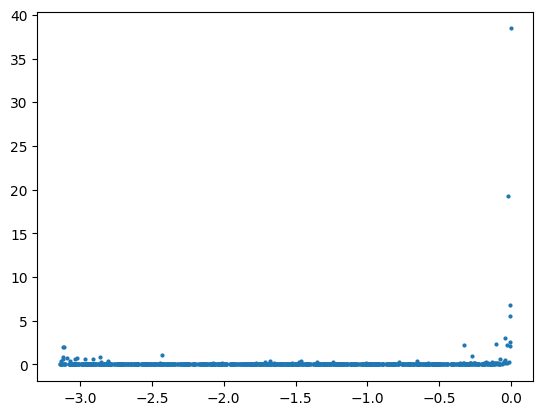

In [34]:
plt.scatter(clean_angles[:1000, 2], relative_err, s =4)

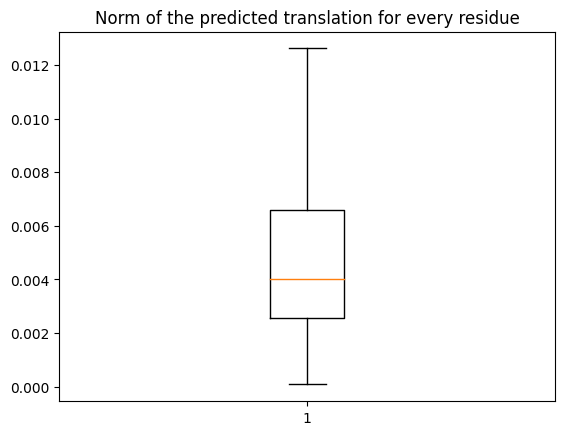

In [84]:
plt.boxplot(np.sqrt(np.sum(predicted_translations.detach().numpy()**2, axis=-1).flatten()), showfliers=False)
plt.title("Norm of the predicted translation for every residue")
plt.savefig(data_path + "predicted_translation_boxplot.png")
plt.show()

In [51]:
axis_predicted[653]

tensor([[-0.1852,  0.8597, -0.4760],
        [-0.1852,  0.8597, -0.4760],
        [-0.1852,  0.8597, -0.4760],
        ...,
        [ 0.0374,  0.9993,  0.0101],
        [ 0.0374,  0.9993,  0.0101],
        [ 0.0374,  0.9993,  0.0101]], grad_fn=<SelectBackward0>)

In [52]:
angles_predicted[653]

tensor([ 0.0009,  0.0009,  0.0009,  ..., -0.4218, -0.4218, -0.4218],
       grad_fn=<SelectBackward0>)

In [54]:
axis[653]

tensor([-0., 1., -0.])

In [55]:
angles[653]

tensor([-0.0000, -0.0000, -0.0210, -0.0000])

In [91]:
transform_pdb(data_path + "ranked_0.pdb", 
              data_path + "predictedTransformed0.pdb", 
             predicted_rotations[653],model.local_frame_in_colums.detach().numpy())

rotate_domain_pdb(data_path + "ranked_0.pdb", 
              data_path + "trueTransformed0.pdb", model.cutoff2, 1511, 
             rotation_matrices[653][2],model.local_frame_in_colums.detach().numpy())

In [93]:
for i in range(20):
    rotate_domain_pdb(data_path + "ranked_0.pdb", 
              data_path + "example"+str(i)+".pdb", model.cutoff2, 1511, 
             rotation_matrices[i][2],model.local_frame_in_colums.detach().numpy())

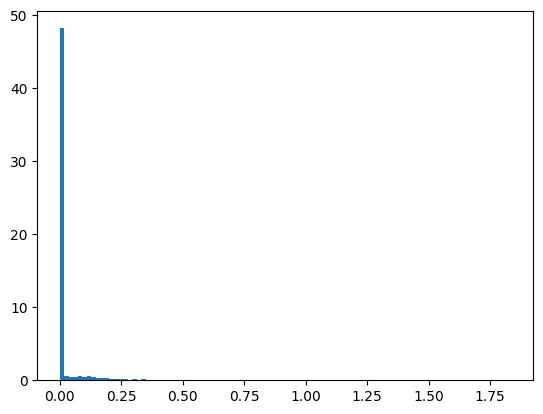

In [72]:
plt.hist(torch.sqrt(torch.sum(predicted_translations**2, dim=-1)).flatten().detach().numpy(), density=True, bins=100)
plt.show()

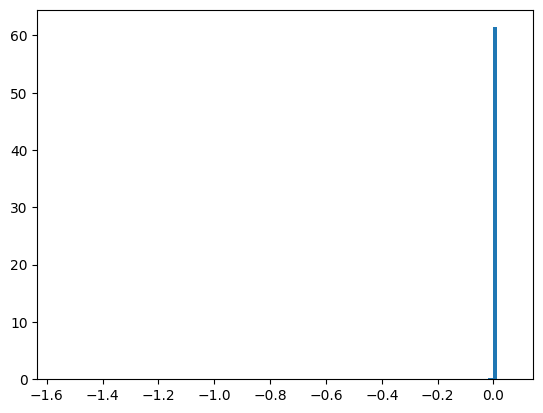

In [85]:
plt.hist(angles_predicted[:, :model.cutoff2].flatten().detach().numpy(), density=True, bins=100)
plt.show()

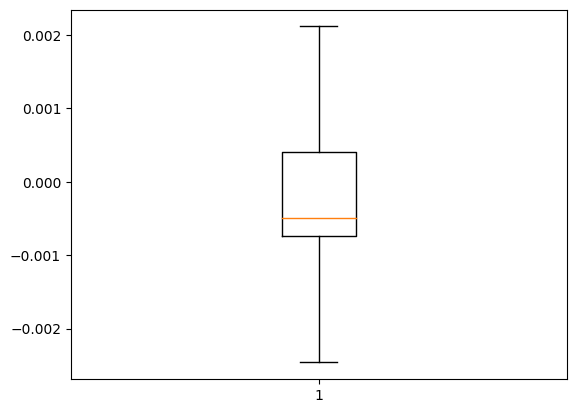

In [91]:
plt.boxplot(angles_predicted[:, :model.cutoff2].flatten().detach().numpy(), showfliers=False)
plt.show()

In [27]:
model.cutoff1

300

In [27]:
parser = PDBParser()
pdb_structure = parser.get_structure("1", "data/transformationsPresentation/ranked_0.pdb")
rotate_residues(pdb_structure, predicted_rotations.detach().numpy()[0], model.local_frame_in_colums.detach().numpy())
io = PDBIO()
io.set_structure(pdb_structure)
io.save("data/transformationsPresentation/transformed0.pdb")

In [23]:
model.local_frame_in_colums

torch.Size([1000, 1510, 3, 3])

In [4]:
help(rotate_residues)

Help on function rotate_residues in module protein.main:

rotate_residues(pdb_structure, rotation_matrix, local_frame)
    Rotate the residue with corresponding rotation matrices.
    :param pdb_structure: pdb structure in biopython
    :param rotation_matrix: np array (N_residue, 3,3) of rotation matrices per residue
    :param local_frame: np.array(3, 3) of basis vector of norm 1 in columns



In [131]:
mask = np.load("data/imageTest/mask300.npy")

In [133]:
mask

array([[0.3105439 , 0.02585815, 0.23342103, 0.430177  ],
       [0.46915868, 0.15079314, 0.17775509, 0.20229314],
       [0.3067895 , 0.22956215, 0.22521381, 0.23843454],
       ...,
       [0.08363269, 0.70298195, 0.04824832, 0.165137  ],
       [0.18654989, 0.5385531 , 0.01950298, 0.25539404],
       [0.08418176, 0.43797657, 0.05587786, 0.42196384]], dtype=float32)

## II. Two conformations:

In [180]:
data_path = "data/imagesGMMRotationsPresentation/"
training_axis = torch.load(data_path + "training_rotations_axis.npy", map_location=torch.device('cpu'))
training_angles = torch.load(data_path + "training_rotations_angles.npy", map_location=torch.device('cpu'))
training_indexes = torch.tensor(np.array([i for i in range(10000)]))

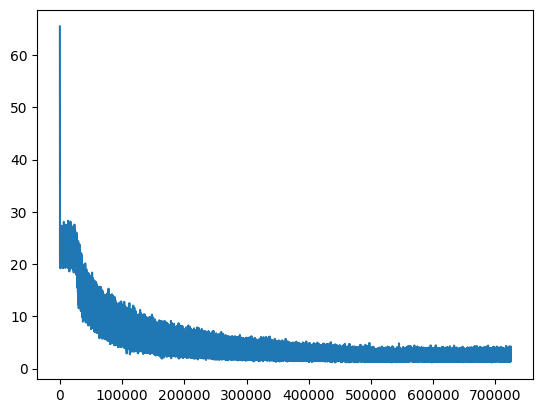

In [182]:
start = 0
lossCheckpoint1 = np.load(data_path + "previousCheckPoint/" + "losses_rmsd.npy")
lossCheckpoint2 = np.load(data_path + "previousCheckPoint2/" + "losses_rmsd.npy")
#plt.plot(loss[start:])
plt.plot(np.concatenate([lossCheckpoint1, lossCheckpoint2])[:])
plt.show()

In [183]:
30000/100

300.0

In [184]:
341*100

34100

In [197]:
data_path

'data/imagesGMMRotationsPresentation/'

In [185]:
mask_evol = mask_evolution(data_path + "masks/")

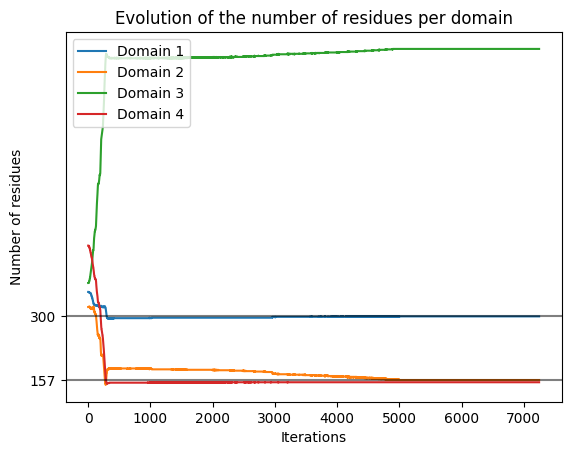

In [203]:
plt.plot(mask_evol[:, 0], label="Domain 1")
plt.plot(mask_evol[:, 1], label="Domain 2")
plt.plot(mask_evol[:, 2], label="Domain 3")
plt.plot(mask_evol[:, 3], label="Domain 4")
plt.axhline(y=157, alpha=0.5, color="black")
plt.axhline(y=300, alpha=0.5, color="black")
plt.yticks([300, 157])
plt.legend(loc="upper left")
plt.title("Evolution of the number of residues per domain")
plt.xlabel("Iterations")
plt.ylabel("Number of residues")
plt.savefig(data_path + "evolution_mask.png")
plt.show()

In [495]:
mask_evol[:, 0]

array([355, 355, 355, ..., 300, 300, 300])

In [496]:
mask_evol[:, 3]

array([459, 459, 459, ..., 152, 152, 152])

In [199]:
model = torch.load(data_path + "previousCheckpoint2/full_model", map_location=torch.device('cpu'))

In [200]:
pca_latent = pca_latent_space(model)

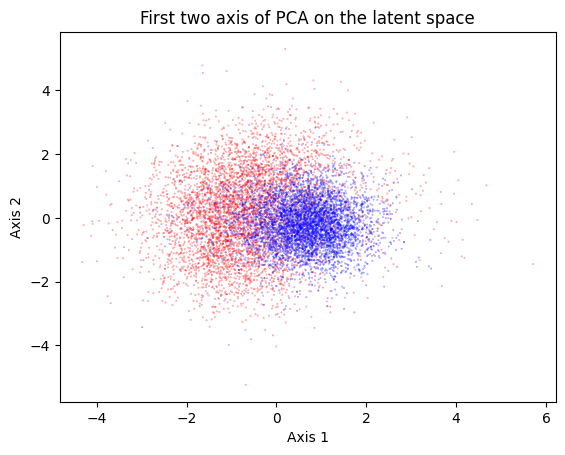

In [213]:
colors = ["red" if i <5000 else "blue" for i in range(10000)]
plt.scatter(pca_latent[:, 0], pca_latent[:, 1], s=0.1, color=colors, alpha=0.5)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")
plt.title ("First two axis of PCA on the latent space")
plt.savefig(data_path + "pca_latent.png")
plt.show()

In [538]:
model.device = "cpu"
model.batch_size = 1000
new_structure, predicted_translations, predicted_rotations = get_predicted_transformations(model, training_indexes[:1000], training_angles[:1000], training_axis
                                                                       [:1000])

In [539]:
axis_angle_predicted = matrix_to_axis_angle(predicted_rotations[:, :, :, :])
angles_predicted = torch.sqrt(torch.sum(axis_angle_predicted**2, axis=-1))
axis_predicted = (axis_angle_predicted/angles_predicted[:, :, None])
predicted_rotations = predicted_rotations.detach().numpy()

clean_axis_predicted = axis_predicted
clean_angles_predicted = angles_predicted
clean_angles_predicted[axis_predicted[:, :, 1] < 0] = -angles_predicted[axis_predicted[:, :, 1] < 0]
clean_axis_predicted[axis_predicted[:, :, 1] < 0] = -axis_predicted[axis_predicted[:, :, 1] < 0]
clean_angles_predicted[clean_angles_predicted >= np.pi] = clean_angles_predicted[clean_angles_predicted >= np.pi] - 2*torch.pi
clean_angles_predicted = clean_angles_predicted.detach().numpy()
clean_axis_predicted = clean_axis_predicted.detach().numpy()

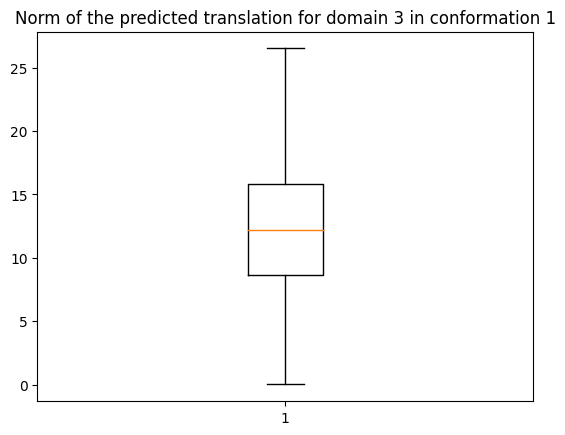

In [540]:
plt.boxplot(torch.sqrt(torch.sum(predicted_translations[:, -157:, :]**2, dim = -1)).flatten().detach().numpy(), showfliers=False)
plt.title("Norm of the predicted translation for domain 3 in conformation 1")
plt.savefig(data_path + "predicted_translation_3rd_domains_boxplot_conformation1.png")
plt.show()

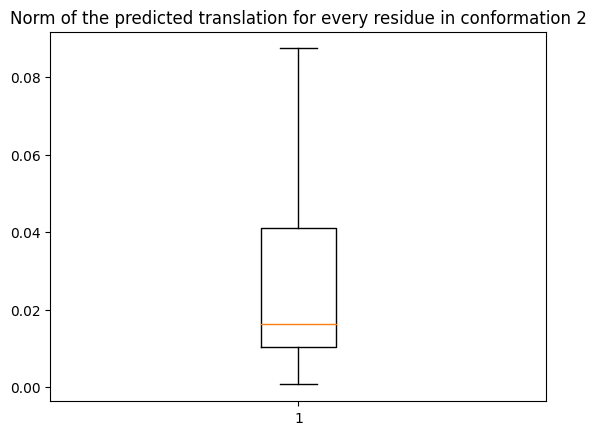

In [506]:
plt.boxplot(torch.sqrt(torch.sum(predicted_translations[:, :1353, :]**2, dim = -1)).flatten().detach().numpy(), showfliers=False)
plt.title("Norm of the predicted translation for every residue in conformation 2")
plt.savefig(data_path + "predicted_translation_other_domains_boxplot_conformation2.png")
plt.show()

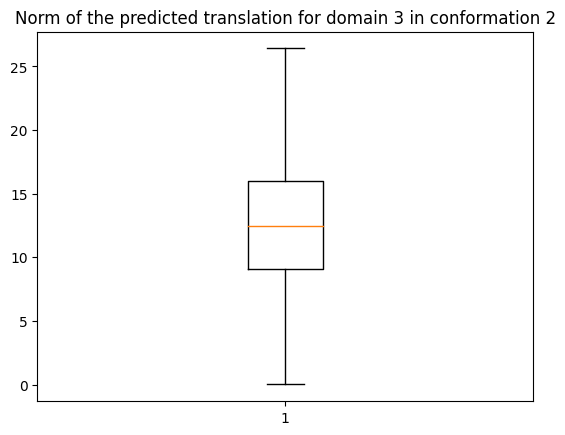

In [507]:
plt.boxplot(torch.sqrt(torch.sum(predicted_translations[:, 1353:, :]**2, dim = -1)).flatten().detach().numpy(), showfliers=False)
plt.title("Norm of the predicted translation for domain 3 in conformation 2")
plt.savefig(data_path + "predicted_translation_3rd_domains_boxplot_conformation2.png")
plt.show()

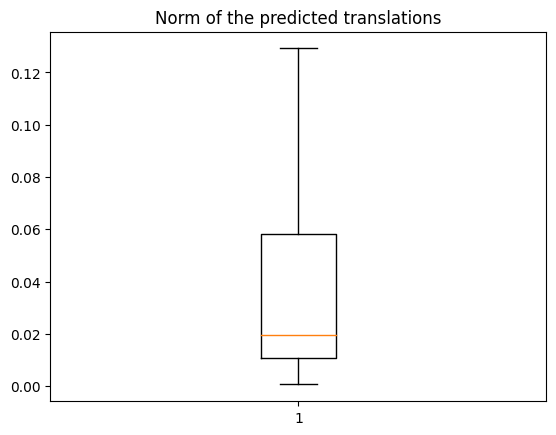

In [508]:
plt.boxplot(torch.sqrt(torch.sum(predicted_translations[:, :, :]**2, dim = -1)).flatten().detach().numpy(), showfliers=False)
plt.title("Norm of the predicted translations")
plt.savefig(data_path + "predicted_translation_boxplot_conformation2.png")
plt.show()

In [509]:
rmsd_axis = np.sqrt(np.sum((clean_axis_predicted[:, -157:] - clean_axis[-1000:, None, :].detach().numpy())**2, axis=-1))

In [510]:
all_axis[-1000:, 2, :]

tensor([[ 0., -1.,  0.],
        [ 0., -1.,  0.],
        [ 0., -1.,  0.],
        ...,
        [ 0., -1.,  0.],
        [ 0., -1.,  0.],
        [ 0., -1.,  0.]])

In [511]:
clean_axis[:1000, None, :].shape

torch.Size([1000, 1, 3])

In [512]:
error_angle = np.arccos(np.sum(np.abs(clean_axis_predicted[:, -157:]) * np.abs(clean_axis[-1000:, None, :].detach().numpy()), axis=-1))

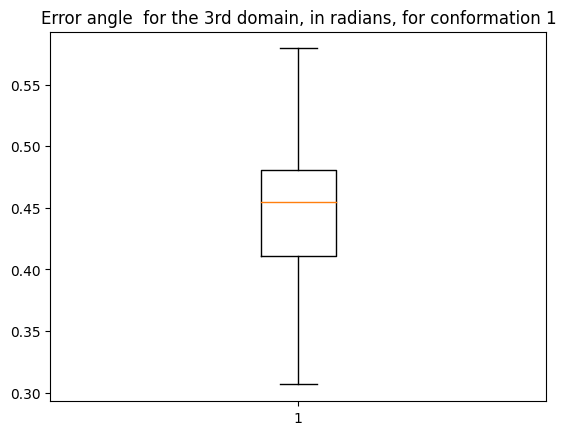

In [514]:
plt.boxplot(error_angle.flatten(), showfliers=False)
plt.title("Error angle  for the 3rd domain, in radians, for conformation 1")
plt.savefig(data_path + "error_angle_axis_3rd_domain_conformation_1.png")
plt.show()

0.39269908169872414

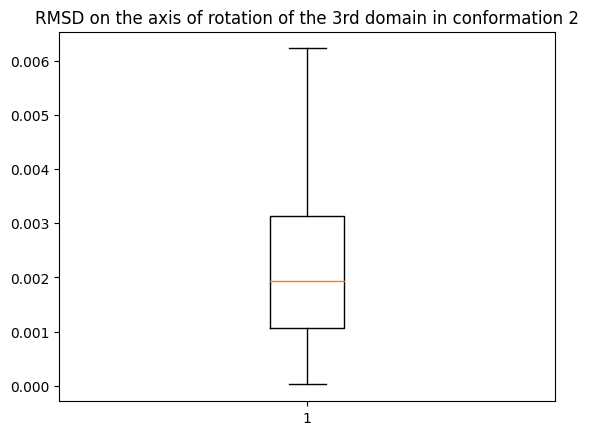

In [450]:
plt.boxplot(rmsd_axis.flatten(), showfliers=False)
plt.title("RMSD on the axis of rotation of the 3rd domain in conformation 2")
plt.savefig(data_path + "rmsd_axis_3rd_domain_conformation_2.png")
plt.show()

In [451]:
rmsd_axis = np.sqrt(np.sum((np.abs(clean_axis_predicted[:, :300]) - np.array([[0, 0, 1]]))**2, axis=-1))

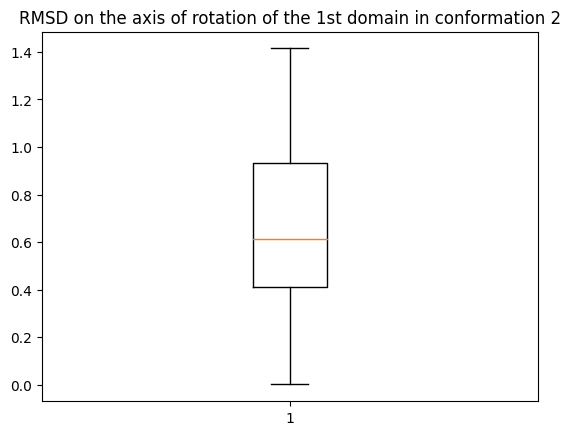

In [452]:
plt.boxplot(rmsd_axis.flatten(), showfliers=False)
plt.title("RMSD on the axis of rotation of the 1st domain in conformation 2")
plt.savefig(data_path + "rmsd_axis_1st_domain_conformation_2.png")
plt.show()

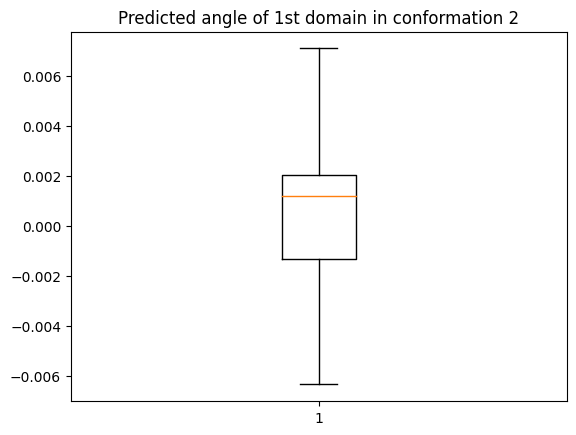

In [472]:
plt.boxplot(angles_predicted[:, :300].detach().numpy().flatten(), showfliers=False)
plt.title("Predicted angle of 1st domain in conformation 2")
plt.savefig(data_path + "predicted_angle_1st_domain_conformation_2.png")
plt.show()

In [485]:
angles[:, 2]

tensor([ 1.5708,  1.5708,  1.5708,  ..., -1.5708, -1.5708, -1.5708])

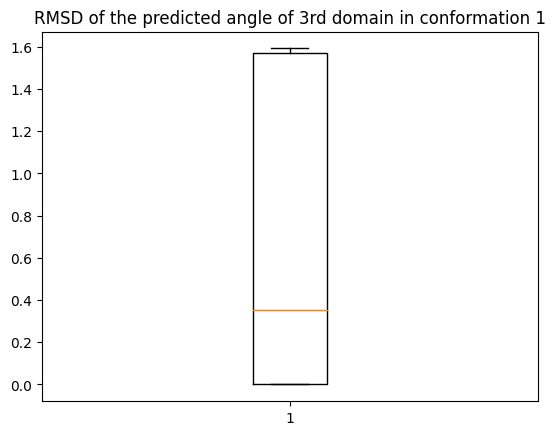

In [532]:
plt.boxplot(np.abs(angles_predicted[:, :300].detach().numpy().flatten() - np.pi/4), showfliers=False)
plt.title("RMSD of the predicted angle of 3rd domain in conformation 1")
plt.savefig(data_path + "rmsd_angle_3rd_domain_conformation_1.png")
plt.show()

In [531]:
np.abs(angles_predicted[:, :300].detach().numpy().flatten()) - np.pi/4

array([ 0.00452626,  0.00452626,  0.00452626, ..., -0.11475396,
       -0.2296949 , -0.39350566], dtype=float32)

In [520]:
rotation_matrices = torch.load(data_path + "training_conformation_rotation_matrices.npy", map_location=torch.device('cpu'))
axis_angle = matrix_to_axis_angle(rotation_matrices)
angles = torch.sqrt(torch.sum(axis_angle**2, axis=-1))
all_axis = axis = (axis_angle/angles[:, :, None])
axis = (axis_angle/angles[:, :, None])[:, 2, :]
rotation_matrices = rotation_matrices.detach().numpy()

clean_angles = angles
clean_axis = axis
clean_angles[axis[:, 1] < 0] = -angles[axis[:, 1] < 0]
clean_axis[axis[:, 1] < 0] = -axis[axis[:, 1] < 0]
clean_angles[clean_angles >=np.pi] = clean_angles[clean_angles >=np.pi] - 2*torch.pi
clean_angles = clean_angles.detach().numpy()
clean_axis = clean_axis

In [525]:
all_axis

tensor([[[ 0.,  0., -1.],
         [nan, nan, nan],
         [ 0.,  1.,  0.],
         [nan, nan, nan]],

        [[ 0.,  0., -1.],
         [nan, nan, nan],
         [ 0.,  1.,  0.],
         [nan, nan, nan]],

        [[ 0.,  0., -1.],
         [nan, nan, nan],
         [ 0.,  1.,  0.],
         [nan, nan, nan]],

        ...,

        [[nan, nan, nan],
         [nan, nan, nan],
         [ 0., -1.,  0.],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [ 0., -1.,  0.],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [ 0., -1.,  0.],
         [nan, nan, nan]]])

In [521]:
angles

tensor([[ 0.7854,  0.0000,  1.5708,  0.0000],
        [ 0.7854,  0.0000,  1.5708,  0.0000],
        [ 0.7854,  0.0000,  1.5708,  0.0000],
        ...,
        [-0.0000, -0.0000, -1.5708, -0.0000],
        [-0.0000, -0.0000, -1.5708, -0.0000],
        [-0.0000, -0.0000, -1.5708, -0.0000]])

In [382]:
np.sign(clean_angles_predicted)[:, :300, None].shape

(1000, 300, 1)

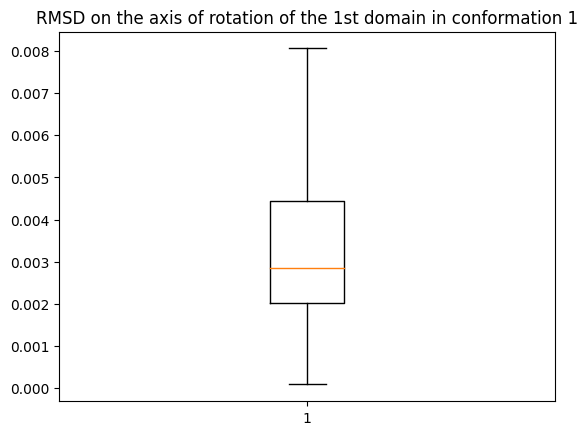

In [383]:
rmsd = np.sqrt(np.sum(((axis_predicted[:, :300].detach().numpy() * np.sign(angles_predicted.detach().numpy())[:, :300, None]) - 
 np.array([[0, 0, -1]]))**2, axis=-1))
plt.boxplot(rmsd.flatten(), showfliers=False)
plt.title("RMSD on the axis of rotation of the 1st domain in conformation 1")
plt.savefig(data_path + "rmsd_axis_1st_domain_conformation_1.png")
plt.show()

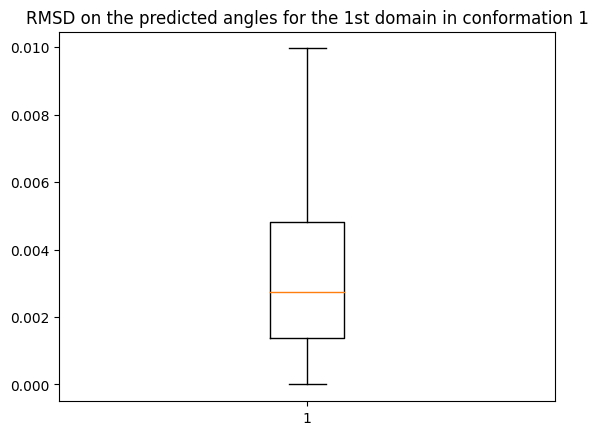

In [384]:
plt.boxplot(np.abs(np.abs(angles_predicted[:, :300].flatten().detach().numpy()) - np.pi/4), showfliers=False)
plt.title("RMSD on the predicted angles for the 1st domain in conformation 1")
plt.savefig(data_path + "rmsd_angle_1st_domain_conformation_1.png")
plt.show()

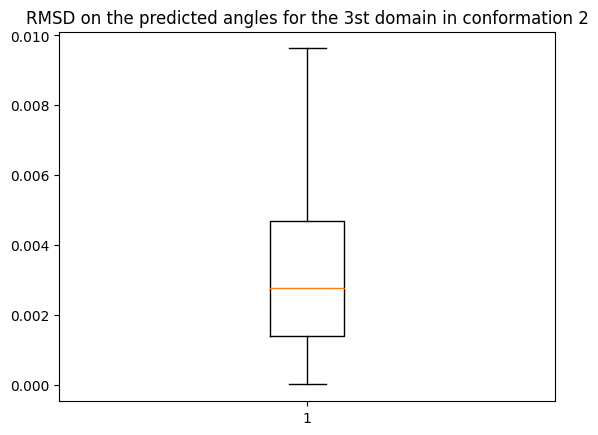

In [475]:
plt.boxplot(np.abs(np.abs(angles_predicted[:, 1353:].flatten().detach().numpy()) - np.pi/2), showfliers=False)
plt.title("RMSD on the predicted angles for the 3st domain in conformation 2")
plt.savefig(data_path + "rmsd_angle_3rd_domain_conformation_2.png")
plt.show()

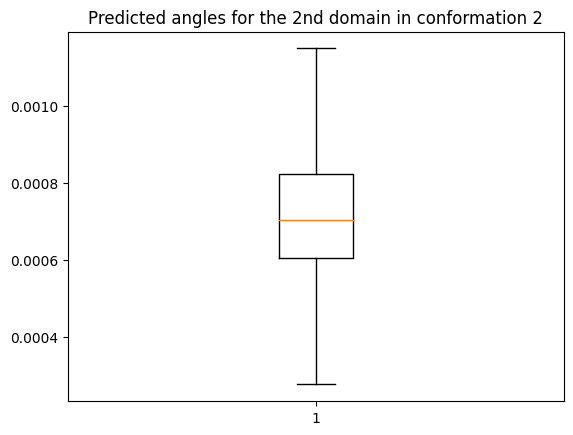

In [476]:
plt.boxplot(np.abs(np.abs(angles_predicted[:, 300:1353].flatten().detach().numpy())), showfliers=False)
plt.title("Predicted angles for the 2nd domain in conformation 2")
plt.savefig(data_path + "angle_2nd_domain_conformation_2.png")
plt.show()

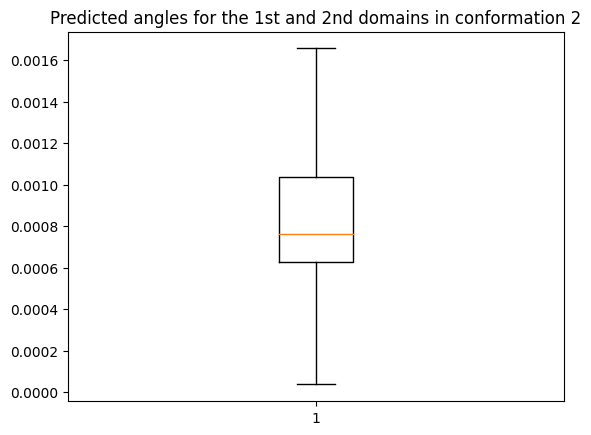

In [492]:
plt.boxplot(np.abs(np.abs(angles_predicted[:, :1353].flatten().detach().numpy())), showfliers=False)
plt.title("Predicted angles for the 1st and 2nd domains in conformation 2")
plt.savefig(data_path + "angle_1st_2nd_domain_conformation_2.png")
plt.show()

In [494]:
idx = 900
transform_pdb(data_path + "ranked_0.pdb", 
              data_path + "predictedTransformed0_conformation2.pdb", 
             predicted_rotations[idx],model.local_frame_in_colums.detach().numpy())

np_translation = predicted_translations[idx].detach().numpy()
translate_residues_pdb(data_path + "predictedTransformed0_conformation2.pdb",
                       data_path + "predictedTransformed0_conformation2.pdb", np_translation)

rotate_domain_pdb(data_path + "ranked_0.pdb", 
              data_path + "trueTransformed0_conformation2.pdb", model.cutoff2, 1511, 
             rotation_matrices[-1][2],model.local_frame_in_colums.detach().numpy())

rotate_domain_pdb(data_path + "trueTransformed0_conformation2.pdb", 
              data_path + "trueTransformed0_conformation2.pdb", 0, model.cutoff1, 
             rotation_matrices[-1][0],model.local_frame_in_colums.detach().numpy())



[[ 0.01524756 -0.01769063  0.00494044]
 [ 0.01524756 -0.01769063  0.00494044]
 [ 0.01524756 -0.01769063  0.00494044]
 ...
 [ 0.0198907   0.0161261   0.00029685]
 [ 0.0198907   0.0161261   0.00029685]
 [ 0.0198907   0.0161261   0.00029685]]


In [362]:
rotation_matrices.shape

(10000, 4, 3, 3)

In [336]:
angles_predicted[:, :300].flatten().detach().numpy() + np.pi/4

array([-0.00458574, -0.00458574, -0.00458574, ...,  1.4562851 ,
        1.3413107 ,  0.39334404], dtype=float32)

In [331]:
np.pi/4

0.7853981633974483

In [327]:
np.pi/4

0.7853981633974483

In [290]:
clean_angles_predicted.shape

(1000, 1510)

In [282]:
clean_angles_predicted[:, :300]*clean_axis_predicted

array([[-0.7899839 , -0.7899839 , -0.7899839 , ..., -0.67621094,
        -0.56022143, -0.39491493],
       [-0.00315789, -0.00315789, -0.00315789, ..., -0.00275967,
        -0.00236391, -0.00183086],
       [-0.78430176, -0.78430176, -0.78430176, ..., -0.6712242 ,
        -0.55594337, -0.39164698],
       ...,
       [ 0.7734622 ,  0.7734622 ,  0.7734622 , ...,  0.66206187,
         0.5484909 ,  0.38663173],
       [ 0.7828905 ,  0.7828905 ,  0.7828905 , ...,  0.67005056,
         0.5550119 ,  0.39106086],
       [ 0.78366405,  0.78366405,  0.78366405, ...,  0.67088693,
         0.5559125 , -0.39205414]], dtype=float32)

In [269]:
angles

tensor([[ 0.7854,  0.0000,  1.5708,  0.0000],
        [ 0.7854,  0.0000,  1.5708,  0.0000],
        [ 0.7854,  0.0000,  1.5708,  0.0000],
        ...,
        [-0.0000, -0.0000, -1.5708, -0.0000],
        [-0.0000, -0.0000, -1.5708, -0.0000],
        [-0.0000, -0.0000, -1.5708, -0.0000]])

In [288]:
all_axis[:, 0]

tensor([[ 0.,  0., -1.],
        [ 0.,  0., -1.],
        [ 0.,  0., -1.],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]])

In [273]:
axis_angle_predicted[:, :300]

tensor([[[ 2.0952e-03, -4.9590e-04, -7.9014e-01],
         [ 2.0952e-03, -4.9590e-04, -7.9014e-01],
         [ 2.0952e-03, -4.9590e-04, -7.9014e-01],
         ...,
         [ 1.7615e-03, -5.6959e-04, -6.7633e-01],
         [ 1.4050e-03, -6.3875e-04, -5.6031e-01],
         [ 8.6927e-04, -7.2521e-04, -3.9496e-01]],

        [[ 8.7653e-03,  1.1744e-02, -7.6731e-01],
         [ 8.7653e-03,  1.1744e-02, -7.6731e-01],
         [ 8.7653e-03,  1.1744e-02, -7.6731e-01],
         ...,
         [ 7.4070e-03,  1.0342e-02, -6.5712e-01],
         [ 6.0558e-03,  8.9193e-03, -5.4478e-01],
         [ 4.1887e-03,  6.9002e-03, -3.8469e-01]],

        [[ 4.8108e-04, -1.6596e-03, -7.8508e-01],
         [ 4.8108e-04, -1.6596e-03, -7.8508e-01],
         [ 4.8108e-04, -1.6596e-03, -7.8508e-01],
         ...,
         [ 4.2867e-04, -1.4810e-03, -6.7202e-01],
         [ 3.6800e-04, -1.2999e-03, -5.5675e-01],
         [ 2.6898e-04, -1.0428e-03, -3.9248e-01]],

        ...,

        [[ 3.0956e-03,  1.9251e-03, -7

In [267]:
clean_angles_predicted[0, :300]

array([-0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 ,
       -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 ,
       -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 ,
       -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 ,
       -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 ,
       -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 ,
       -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 ,
       -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 ,
       -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 ,
       -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 ,
       -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 ,
       -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 ,
       -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 ,
       -0.7901406 , -0.7901406 , -0.7901406 , -0.7901406 , -0.79

In [262]:
clean_axis_predicted[:, :300]

array([[[-2.6517019e-03,  6.2761526e-04,  9.9999624e-01],
        [-2.6517019e-03,  6.2761526e-04,  9.9999624e-01],
        [-2.6517019e-03,  6.2761526e-04,  9.9999624e-01],
        ...,
        [-2.6045041e-03,  8.4216299e-04,  9.9999619e-01],
        [-2.5074321e-03,  1.1399762e-03,  9.9999619e-01],
        [-2.2008913e-03,  1.8361375e-03,  9.9999583e-01]],

       [[ 1.1421379e-02,  1.5303361e-02, -9.9981761e-01],
        [ 1.1421379e-02,  1.5303361e-02, -9.9981761e-01],
        [ 1.1421379e-02,  1.5303361e-02, -9.9981761e-01],
        ...,
        [ 1.1269873e-02,  1.5735500e-02, -9.9981266e-01],
        [ 1.1113857e-02,  1.6369022e-02, -9.9980432e-01],
        [ 1.0886162e-02,  1.7933415e-02, -9.9977988e-01]],

       [[-6.1277341e-04,  2.1139609e-03,  9.9999756e-01],
        [-6.1277341e-04,  2.1139609e-03,  9.9999756e-01],
        [-6.1277341e-04,  2.1139609e-03,  9.9999756e-01],
        ...,
        [-6.3787907e-04,  2.2038247e-03,  9.9999732e-01],
        [-6.6097989e-04,  2.3

In [235]:
axis_predicted[653][1353:]

tensor([[ 0.4464,  0.8852, -0.1313],
        [ 0.4661,  0.8756, -0.1271],
        [ 0.4738,  0.8717, -0.1253],
        [ 0.4769,  0.8701, -0.1246],
        [ 0.4781,  0.8694, -0.1243],
        [ 0.4787,  0.8692, -0.1241],
        [ 0.4788,  0.8691, -0.1240],
        [ 0.4789,  0.8691, -0.1239],
        [ 0.4789,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
        [ 0.4790,  0.8691, -0.1239],
 

In [218]:
angles_predicted[653][1353:]

tensor([-0.0191, -0.0471, -0.1118, -0.2502, -0.5017, -0.8483, -1.1796, -1.4026,
        -1.5195, -1.5728, -1.5956, -1.6051, -1.6090, -1.6106, -1.6112, -1.6115,
        -1.6116, -1.6116, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117,
        -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117,
        -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117,
        -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117,
        -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117,
        -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117,
        -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117,
        -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117,
        -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117,
        -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117, -1.6117,
        -1.6117, -1.6117, -1.6117, -1.61

In [196]:
predicted_rotations[653][1360:]

array([[[ 0.355178  ,  0.2160054 , -0.9095001 ],
        [ 0.4768828 ,  0.7949434 ,  0.37503058],
        [ 0.8040097 , -0.5669275 ,  0.17933711]],

       [[ 0.26535928,  0.2626761 , -0.92767763],
        [ 0.5267883 ,  0.76635695,  0.36768356],
        [ 0.80751383, -0.586258  ,  0.0649852 ]],

       [[ 0.22411816,  0.28471044, -0.9320468 ],
        [ 0.549098  ,  0.75323176,  0.3621233 ],
        [ 0.8051475 , -0.59294343,  0.01247906]],

       ...,

       [[ 0.19409722,  0.3009873 , -0.9336664 ],
        [ 0.56510067,  0.7436779 ,  0.3572176 ],
        [ 0.80186504, -0.5969505 , -0.02574229]],

       [[ 0.19409722,  0.3009873 , -0.9336664 ],
        [ 0.56510067,  0.7436779 ,  0.3572176 ],
        [ 0.80186504, -0.5969505 , -0.02574229]],

       [[ 0.19409722,  0.3009873 , -0.9336664 ],
        [ 0.56510067,  0.7436779 ,  0.3572176 ],
        [ 0.80186504, -0.5969505 , -0.02574229]]], dtype=float32)

In [197]:
rotation_matrices = torch.load(data_path + "training_conformation_rotation_matrices.npy", map_location=torch.device('cpu'))
axis_angle = matrix_to_axis_angle(rotation_matrices)
angles = torch.sqrt(torch.sum(axis_angle**2, axis=-1))
axis = (axis_angle/angles[:, :, None])[:, 2, :]
rotation_matrices = rotation_matrices.detach().numpy()

translation_vectors = torch.load(data_path + "training_set.npy", torch.device('cpu'))

#clean_angles = angles
#clean_axis = axis
#clean_angles[axis[:, 1] < 0] = -angles[axis[:, 1] < 0]
#clean_axis[axis[:, 1] < 0] = -axis[axis[:, 1] < 0]
#clean_angles[clean_angles >=np.pi] = clean_angles[clean_angles >=np.pi] - 2*torch.pi
#clean_angles = clean_angles.detach().numpy()
#clean_axis = clean_axis

In [198]:
translation_vectors

tensor([[-8., -8.,  0.,  ...,  0.,  0.,  0.],
        [-8., -8.,  0.,  ...,  0.,  0.,  0.],
        [-8., -8.,  0.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]])

In [199]:
torch.reshape(translation_vectors, (10000, 4, 3))[0]

tensor([[-8., -8.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])

In [200]:
angles

tensor([[0.7854, 0.0000, 1.5708, 0.0000],
        [0.7854, 0.0000, 1.5708, 0.0000],
        [0.7854, 0.0000, 1.5708, 0.0000],
        ...,
        [0.0000, 0.0000, 1.5708, 0.0000],
        [0.0000, 0.0000, 1.5708, 0.0000],
        [0.0000, 0.0000, 1.5708, 0.0000]])

In [201]:
axis

tensor([[ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        ...,
        [ 0., -1.,  0.],
        [ 0., -1.,  0.],
        [ 0., -1.,  0.]])

In [202]:
rotation_matrices[-1000:][653][2]

array([[ 0.,  0., -1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.]], dtype=float32)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8615e00160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8615e006a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f86636dbe80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8615e00be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8615e00e80>],
 'means': []}

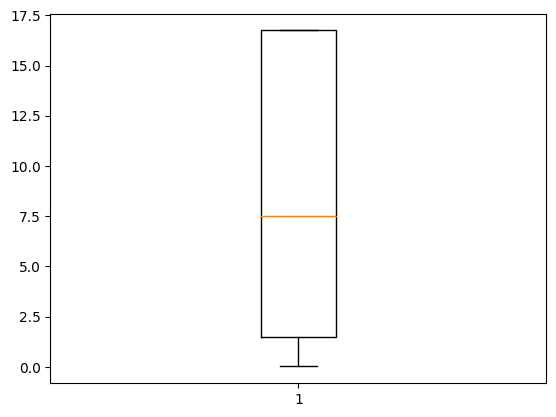

In [203]:
plt.boxplot(predicted_translations[0][1353:].flatten().detach().numpy())

In [204]:
predicted_translations[0][1353:]

tensor([[ 0.2041,  0.0220,  0.1007],
        [ 0.4948,  0.0477,  0.2312],
        [ 1.1672,  0.1071,  0.5331],
        [ 2.6045,  0.2340,  1.1785],
        [ 5.2175,  0.4648,  2.3518],
        [ 8.8170,  0.7826,  3.9681],
        [12.2589,  1.0866,  5.5136],
        [14.5749,  1.2912,  6.5535],
        [15.7889,  1.3984,  7.0987],
        [16.3431,  1.4473,  7.3475],
        [16.5799,  1.4682,  7.4538],
        [16.6783,  1.4769,  7.4980],
        [16.7187,  1.4805,  7.5161],
        [16.7352,  1.4819,  7.5235],
        [16.7419,  1.4825,  7.5266],
        [16.7446,  1.4828,  7.5278],
        [16.7457,  1.4829,  7.5283],
        [16.7462,  1.4829,  7.5285],
        [16.7464,  1.4829,  7.5286],
        [16.7464,  1.4829,  7.5286],
        [16.7465,  1.4829,  7.5286],
        [16.7465,  1.4829,  7.5286],
        [16.7465,  1.4829,  7.5286],
        [16.7465,  1.4829,  7.5286],
        [16.7465,  1.4829,  7.5286],
        [16.7465,  1.4829,  7.5286],
        [16.7465,  1.4829,  7.5286],
 

In [205]:
#model.device = "cpu"
#model.batch_size = 1000
#new_structure, predicted_translations, predicted_rotations = get_predicted_transformations(model, training_indexes[-1000:], training_angles[-1000:], training_axis
                                                                       [-1000:])

IndentationError: unexpected indent (4172933970.py, line 4)

In [206]:
#new_structure, weights, translations, latent_variables = model.forward(training_indexes[:1000], training_angles[:1000], training_axis[:1000])

In [207]:
predicted_translations[990]

tensor([[ 1.0851e-02,  4.3664e-03, -2.3133e-02],
        [ 1.0851e-02,  4.3664e-03, -2.3133e-02],
        [ 1.0851e-02,  4.3664e-03, -2.3133e-02],
        ...,
        [ 1.6586e+01,  4.6667e-01,  9.2151e+00],
        [ 1.6586e+01,  4.6667e-01,  9.2151e+00],
        [ 1.6586e+01,  4.6667e-01,  9.2151e+00]], grad_fn=<SelectBackward0>)

In [209]:
idx = 900
transform_pdb("data/transformationsPresentation/ranked_0.pdb", 
              "data/transformationsPresentation/predictedTransformed0.pdb", 
             predicted_rotations[idx],model.local_frame_in_colums.detach().numpy())

np_translation = predicted_translations[idx].detach().numpy()
translate_residues_pdb("data/transformationsPresentation/predictedTransformed0.pdb",
                       "data/transformationsPresentation/predictedTransformed0.pdb", np_translation)

rotate_domain_pdb("data/transformationsPresentation/ranked_0.pdb", 
              "data/transformationsPresentation/trueTransformed0.pdb", model.cutoff2, 1511, 
             rotation_matrices[1000:][idx][2],model.local_frame_in_colums.detach().numpy())

rotate_domain_pdb("data/transformationsPresentation/trueTransformed0.pdb", 
              "data/transformationsPresentation/trueTransformed0.pdb", 0, model.cutoff1, 
             rotation_matrices[1000:][idx][0],model.local_frame_in_colums.detach().numpy())



[[ 5.4415595e-02 -3.9271731e-03 -9.7680077e-02]
 [ 5.4415595e-02 -3.9271731e-03 -9.7680077e-02]
 [ 5.4415595e-02 -3.9271731e-03 -9.7680077e-02]
 ...
 [ 4.9738283e+00 -8.6503577e-01 -2.2167428e+00]
 [ 4.9738283e+00 -8.6503577e-01 -2.2167428e+00]
 [ 4.9738283e+00 -8.6503577e-01 -2.2167428e+00]]


In [179]:
rotation_matrices[-1000:][653][2]

array([[ 0.,  0., -1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.]], dtype=float32)

In [180]:
predicted_rotations[653]

array([[[ 1.0000000e+00, -1.2168277e-04, -1.8809922e-04],
        [ 1.2150415e-04,  9.9999952e-01, -9.4934198e-04],
        [ 1.8821465e-04,  9.4931904e-04,  9.9999952e-01]],

       [[ 1.0000000e+00, -1.2168277e-04, -1.8809922e-04],
        [ 1.2150415e-04,  9.9999952e-01, -9.4934198e-04],
        [ 1.8821465e-04,  9.4931904e-04,  9.9999952e-01]],

       [[ 1.0000000e+00, -1.2168277e-04, -1.8809922e-04],
        [ 1.2150415e-04,  9.9999952e-01, -9.4934198e-04],
        [ 1.8821465e-04,  9.4931904e-04,  9.9999952e-01]],

       ...,

       [[-2.6555061e-03, -2.0804910e-03, -9.9999428e-01],
        [ 1.3171224e-03,  9.9999696e-01, -2.0839944e-03],
        [ 9.9999559e-01, -1.3226491e-03, -2.6527643e-03]],

       [[-2.6555061e-03, -2.0804910e-03, -9.9999428e-01],
        [ 1.3171224e-03,  9.9999696e-01, -2.0839944e-03],
        [ 9.9999559e-01, -1.3226491e-03, -2.6527643e-03]],

       [[-2.6555061e-03, -2.0804910e-03, -9.9999428e-01],
        [ 1.3171224e-03,  9.9999696e-01, -2.08399

In [183]:
translations[653]

tensor([[-0.0427,  0.0693,  0.0193],
        [-0.0427,  0.0693,  0.0193],
        [-0.0427,  0.0693,  0.0193],
        ...,
        [ 9.3819,  0.6939,  6.7689],
        [ 9.3819,  0.6939,  6.7689],
        [ 9.3819,  0.6939,  6.7689]], grad_fn=<SelectBackward0>)

In [157]:
predicted_rotations[653][-100]

array([[-0.00265551, -0.00208049, -0.9999943 ],
       [ 0.00131712,  0.99999696, -0.00208399],
       [ 0.9999956 , -0.00132265, -0.00265276]], dtype=float32)

In [170]:
angles_predicted[653][-153:]

tensor([-0.4903, -0.8285, -1.1518, -1.3694, -1.4835, -1.5356, -1.5578, -1.5670,
        -1.5708, -1.5724, -1.5730, -1.5733, -1.5734, -1.5734, -1.5734, -1.5734,
        -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735,
        -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735,
        -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735,
        -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735,
        -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735,
        -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735,
        -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735,
        -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735,
        -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735,
        -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735, -1.5735,
        -1.5735, -1.5735, -1.5735, -1.57

In [172]:
angles.shape

torch.Size([10000, 4])

In [175]:
rotation_matrices[-1000:][653][:]

array([[[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]],

       [[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]],

       [[ 0.,  0., -1.],
        [ 0.,  1.,  0.],
        [ 1.,  0.,  0.]],

       [[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]]], dtype=float32)

In [178]:
predicted_translations[653][-153:]

tensor([[0.0545, 0.0087, 0.0566],
        [0.0933, 0.0135, 0.0930],
        [0.1304, 0.0181, 0.1278],
        [0.1553, 0.0212, 0.1512],
        [0.1684, 0.0228, 0.1634],
        [0.1744, 0.0236, 0.1690],
        [0.1769, 0.0239, 0.1714],
        [0.1780, 0.0240, 0.1724],
        [0.1784, 0.0241, 0.1728],
        [0.1786, 0.0241, 0.1730],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.1787, 0.0241, 0.1731],
        [0.178

In [163]:
rotation_matrices[-1000:][653][2]

array([[ 0.,  0., -1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.]], dtype=float32)

In [162]:
(rotation_matrices[-1000:][653][2] - predicted_rotations[653][-100])/predicted_rotations[653][-100]

array([[-1.0000000e+00, -1.0000000e+00,  5.7220786e-06],
       [-1.0000000e+00,  3.0398462e-06, -1.0000000e+00],
       [ 4.4107633e-06, -1.0000000e+00, -1.0000000e+00]], dtype=float32)

In [161]:
rotation_matrices[-1000:][653][2]

array([[ 0.,  0., -1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.]], dtype=float32)

In [84]:
predicted_rotations[0, 1500]

tensor([[ 1.7663e-03,  5.5457e-04, -1.0000e+00],
        [ 1.9133e-03,  1.0000e+00,  5.5795e-04],
        [ 1.0000e+00, -1.9143e-03,  1.7652e-03]], grad_fn=<SelectBackward0>)

In [87]:
rotation_matrices[653][2]

array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [-1.,  0.,  0.]], dtype=float32)

In [131]:
angles[-1000:]

tensor([[0.0000, 0.0000, 1.5708, 0.0000],
        [0.0000, 0.0000, 1.5708, 0.0000],
        [0.0000, 0.0000, 1.5708, 0.0000],
        ...,
        [0.0000, 0.0000, 1.5708, 0.0000],
        [0.0000, 0.0000, 1.5708, 0.0000],
        [0.0000, 0.0000, 1.5708, 0.0000]])

In [103]:
axis[-1000:]

tensor([[ 0., -1.,  0.],
        [ 0., -1.,  0.],
        [ 0., -1.,  0.],
        ...,
        [ 0., -1.,  0.],
        [ 0., -1.,  0.],
        [ 0., -1.,  0.]])

In [30]:
np_translation.shape

(1000, 1510, 3)

In [90]:
np.pi/2

1.5707963267948966

In [95]:
angles_predicted[653][1353:]

tensor([-0.0193, -0.0465, -0.1094, -0.2440, -0.4885, -0.8254, -1.1476, -1.3643,
        -1.4780, -1.5299, -1.5520, -1.5612, -1.5650, -1.5665, -1.5672, -1.5674,
        -1.5675, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676,
        -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676,
        -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676,
        -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676,
        -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676,
        -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676,
        -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676,
        -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676,
        -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676,
        -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676, -1.5676,
        -1.5676, -1.5676, -1.5676, -1.56

In [99]:
axis_predicted[653][1353:]

tensor([[-2.8149e-02,  9.9918e-01, -2.9052e-02],
        [-1.0301e-02,  9.9990e-01, -1.0126e-02],
        [-3.0224e-03,  9.9999e-01, -2.3871e-03],
        [-7.4250e-05,  1.0000e+00,  7.9091e-04],
        [ 1.0930e-03,  1.0000e+00,  2.1255e-03],
        [ 1.5212e-03,  1.0000e+00,  2.7137e-03],
        [ 1.6535e-03,  9.9999e-01,  2.9825e-03],
        [ 1.6854e-03,  9.9999e-01,  3.1029e-03],
        [ 1.6913e-03,  9.9999e-01,  3.1545e-03],
        [ 1.6921e-03,  9.9999e-01,  3.1760e-03],
        [ 1.6921e-03,  9.9999e-01,  3.1849e-03],
        [ 1.6920e-03,  9.9999e-01,  3.1885e-03],
        [ 1.6920e-03,  9.9999e-01,  3.1899e-03],
        [ 1.6920e-03,  9.9999e-01,  3.1905e-03],
        [ 1.6919e-03,  9.9999e-01,  3.1908e-03],
        [ 1.6919e-03,  9.9999e-01,  3.1909e-03],
        [ 1.6919e-03,  9.9999e-01,  3.1909e-03],
        [ 1.6919e-03,  9.9999e-01,  3.1909e-03],
        [ 1.6919e-03,  9.9999e-01,  3.1910e-03],
        [ 1.6919e-03,  9.9999e-01,  3.1910e-03],
        [ 1.6919e-03

In [303]:
class Renderer():
    def __init__(self, pixels_x, pixels_y, N_heavy=4530, std = 1, device="cpu"):
        self.std_blob = std
        self.pixels_x = torch.tensor(pixels_x, dtype=torch.float32, device=device)
        self.pixels_y = torch.tensor(pixels_y, dtype=torch.float32, device=device)
        self.N_heavy_atoms = N_heavy
        self.torch_sqrt_2pi= torch.sqrt(torch.tensor(2*np.pi, device=device))

    def compute_gaussian_kernel(self, x, pixels_pos):
        """
        Computes the values of the gaussian kernel for one axis only but all heavy atoms and samples in batch
        :param x: (N_batch, 1): the coordinate of all heavy atoms on one axis for all samples in batch.
        :return: (N_batch, N_atoms, N_pix)
        """
        batch_size = x.shape[0]
        scaled_distances = -(1/2)*(torch.broadcast_to(pixels_pos, (batch_size, self.N_heavy_atoms, -1)) -
                                   x[:, :, None])**2/self.std_blob
        axis_val = torch.exp(scaled_distances)/self.torch_sqrt_2pi
        return axis_val

    def compute_x_y_values_all_atoms(self, atom_positions):
        """

        :param atom_position: (N_batch, N_atoms, 3)
        :return:
        """
        all_x = self.compute_gaussian_kernel(atom_positions[:, :, 0], self.pixels_x)
        all_y = self.compute_gaussian_kernel(atom_positions[:, :, 1], self.pixels_y)

        prod= torch.einsum("bki,bkj->bkij", (all_x, all_y))
        #prod = torch.bmm(all_x, all_y)
        projected_densities = torch.sum(prod, dim=1)
        #print("Proj:", projected_densities.shape)
        #fft_densities = torch.fft.rfft2(projected_densities)
        #print(fft_densities.shape)
        #CTF_one_dim = torch.sin(torch.linspace(0, 50, 50))
        #CTF = torch.broadcast_to(torch.outer(CTF_one_dim, CTF_one_dim), (1, 50, 50))
        #print("CTF",CTF.shape)
        #print(fft_densities.shape)
        #torch.einsum("bki,bkj->bkij", (all_x, all_y))
        #fft_densities = CTF*fft_densities
        #projected_densities = torch.fft.irfft2(fft_densities)
        ### ADD THE CTF !!!
        return projected_densities #+ torch.randn(size=(1, 256, 256))*0.5

In [304]:
def deform_structure(base_structure, cutoff1, cutoff2, true_deformation, N_residues, device):
    batch_size = true_deformation.shape[0]
    true_deformed_structure = torch.empty((batch_size, 3 * N_residues, 3), device=device)
    true_deformed_structure[:, :3 * cutoff1, :] = base_structure[:3 * cutoff1,
                                                       :] + true_deformation[:, 0:1, :]
    true_deformed_structure[:, 3 * cutoff1:3 * cutoff2, :] = base_structure[
                                                                       3 * cutoff1:3 * cutoff2,
                                                                       :] + true_deformation[:, 1:2, :]
    true_deformed_structure[:, 3 * cutoff2:, :] = base_structure[3 * cutoff2:,
                                                       :] + true_deformation[:, 2:3, :]

    return true_deformed_structure

In [305]:
pixels_x = np.linspace(-70, 70, num=64).reshape(1, -1)
pixels_y = np.linspace(-150, 150, num=64).reshape(1, -1)
renderer = Renderer(pixels_x, pixels_y, std=1, device="cpu")

In [19]:
full_model = torch.load("full_model", map_location=torch.device('cpu'))

In [21]:
full_model.weights.requires_grad

False

In [358]:
training_set = torch.load("data/imageTestWorking/training_set.npy", map_location=torch.device('cpu'))

In [359]:
full_model.device = "cpu"
full_model.batch_size = 100000
cutoff1 = full_model.cutoff1
cutoff2 = full_model.cutoff2

In [360]:
training_set.shape

torch.Size([10000, 12])

In [361]:
training_set = torch.reshape(training_set, (10000, 4, 3))
training_set = training_set[:150, :, :]

In [362]:
base_image = renderer.compute_x_y_values_all_atoms(full_model.atom_absolute_positions[None,:, :])

In [363]:
deformed_structures = deform_structure(full_model.atom_absolute_positions, cutoff1, cutoff2, training_set, 1510, "cpu")

In [364]:
deformed_images = renderer.compute_x_y_values_all_atoms(deformed_structures)

In [365]:
full_model.decoder.input_layer

Sequential(
  (0): Linear(in_features=9, out_features=350, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
)

In [366]:
deformed_images.shape

torch.Size([150, 64, 64])

In [369]:
full_model.forward(torch.zeros(10, 10, 10))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x100 and 4096x1024)

In [351]:
new_structure, mask_weights, translations, latent_distrib_parameters = full_model.forward(deformed_images)

In [340]:
translations[-1][0]

tensor([ 1.1411,  0.5677, -1.6958], grad_fn=<SelectBackward0>)

In [341]:
training_set[-1][0]

tensor([-5.7269,  0.3585,  0.0000])

In [342]:
new_images = renderer.compute_x_y_values_all_atoms(new_structure)

In [86]:
plt.imshow(new_images[-1].detach().numpy(), cmap="gray")

NameError: name 'new_images' is not defined

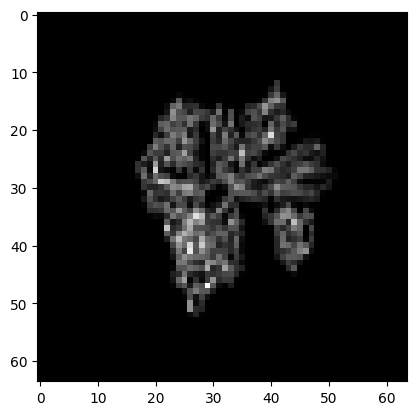

In [344]:
plt.imshow(deformed_images[-1].detach().numpy(), cmap="gray")

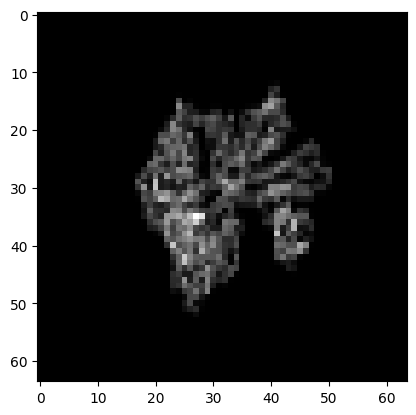

In [345]:
plt.imshow(base_image[-1].detach().numpy(), cmap="gray")

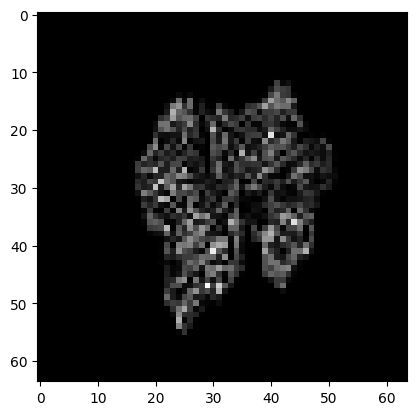

In [346]:
plt.imshow(np.abs((new_images[-1] - deformed_images[-1]).detach().numpy()), cmap="gray")

In [349]:
torch.sum((new_images - deformed_images)**2, dim=(-2, -1))

tensor([302.2756, 260.1404, 186.4803, 283.3183, 323.5407, 302.4139, 268.4542,
        274.8892, 230.9190, 222.6517, 198.2969, 303.7767, 266.3346, 195.0471,
        285.5473, 312.6813, 232.8653, 262.5114, 262.6053, 210.7250, 214.5588,
        214.1859, 218.4828, 229.1100, 265.9356, 285.1156, 232.1299, 213.3379,
        227.6303, 253.1752, 247.3311, 217.0524, 230.7101, 303.5029, 230.5396,
        262.6149, 264.8893, 274.3563, 272.1483, 287.4971, 302.4808, 267.1517,
        259.9269, 226.8151, 272.4852, 174.4615, 261.9424, 213.8195, 256.6652,
        281.1635, 257.8879, 219.8282, 258.4658, 229.6755, 198.8114, 337.7983,
        244.5799, 200.5786, 166.3313, 165.9445, 275.9443, 227.8318, 305.0758,
        312.9803, 218.0864, 250.3508, 188.6604, 191.9538, 225.7592, 284.3256,
        187.0723, 294.4919, 272.8434, 233.1304, 259.1317, 177.2331, 290.0993,
        255.7337, 241.6817, 249.6270, 237.0498, 213.3044, 227.2035, 241.7269,
        250.5642, 192.2504, 180.8551, 270.1558, 226.8346, 247.55

In [ ]:
images = renderer.al

In [22]:
results = full_model.forward(training_set)

IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [41]:
full_model.atom_absolute_positions

tensor([[-11.3769, -19.9073,   0.3674],
        [-11.8119, -18.6403,  -0.2656],
        [-12.5029, -20.9143,   0.2404],
        ...,
        [ -0.7919,  32.8507,   1.5834],
        [  0.4581,  32.1617,   1.2214],
        [ -1.7689,  32.9737,   0.4034]])

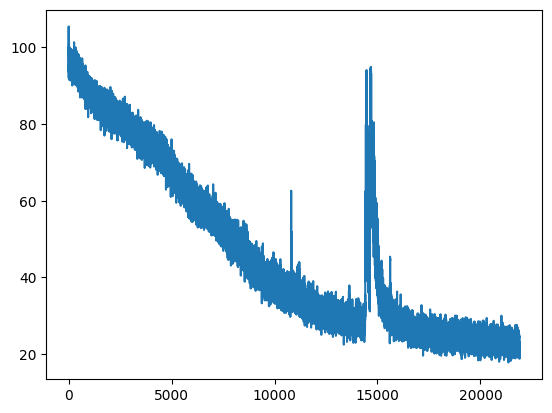

In [383]:
loss = np.load("losses_rmsd.npy")
plt.plot(loss[:23000])

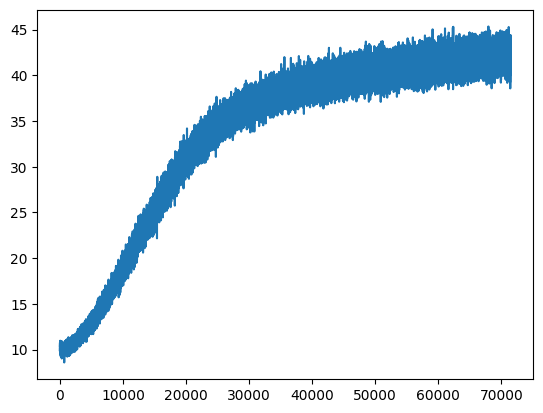

In [286]:
loss_dkl = np.load("losses_dkl.npy")
plt.plot(loss_dkl[:])

In [287]:
len(loss)

91000

In [288]:
len(loss_dkl)

71500

In [292]:
np.min(loss)

6.511573

In [290]:
67100/100

671.0

In [362]:
test = -torch.rand(size=(5000,))*torch.pi

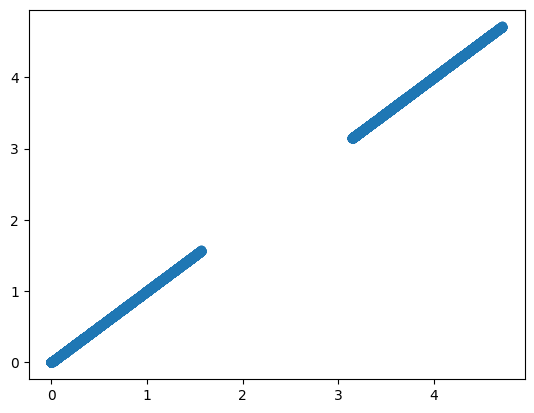

In [365]:
plt.scatter(angles.detach().numpy(), angles.detach().numpy())

In [364]:
angles.shape

torch.Size([10000, 4])

In [369]:
conformation1 = torch.tensor(np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), dtype=torch.float32)
conformation2 = torch.tensor(np.array([0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0]), dtype=torch.float32)
conformation1_rotation_axis = torch.tensor(np.array([[0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0]]), dtype=torch.float32)
#conformation1_rotation_angle = torch.tensor(np.array([-np.pi / 4, 0, np.pi/2, 0]), dtype=torch.float32)
conformation1_rotation_angle = torch.zeros((5000, 4), dtype=torch.float32)
conformation1_rotation_angle[:, 2] = -torch.rand(size=(5000,))*torch.pi
#conformation1_rotation_axis_angle = conformation1_rotation_axis*conformation1_rotation_angle[:, None]
conformation1_rotation_axis_angle = torch.broadcast_to(conformation1_rotation_axis[None, :, :], (5000, 4, 3))\
                                    * conformation1_rotation_angle[:, :, None]

conformation1_rotation_matrix = axis_angle_to_matrix(conformation1_rotation_axis_angle)

#conformation2_rotation_axis = torch.tensor(np.array([[0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0]]), dtype=torch.float32)
#conformation2_rotation_angle = torch.tensor(np.array([0, 0, -np.pi/2, 0]), dtype=torch.float32)
conformation2_rotation_angle = torch.zeros((5000, 4), dtype=torch.float32)
conformation2_rotation_angle[:, 2] = -torch.rand(size=(5000,))*torch.pi
#conformation2_rotation_axis_angle = conformation2_rotation_axis * conformation2_rotation_angle[:, None]
conformation2_rotation_axis_angle = torch.broadcast_to(conformation1_rotation_axis[None, :, :], (5000, 4, 3))\
                                    * conformation1_rotation_angle[:, :, None]
conformation2_rotation_matrix = axis_angle_to_matrix(conformation2_rotation_axis_angle)
conformation_rotation_matrix = torch.cat([conformation1_rotation_matrix, conformation2_rotation_matrix], dim=0)

In [370]:
angles_test = matrix_to_axis_angle(conformation_rotation_matrix)

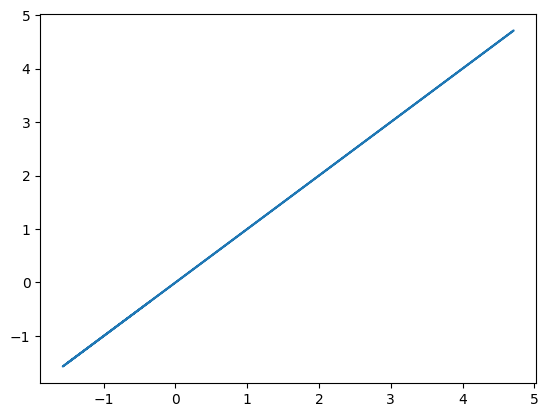

In [378]:
plt.plot(angles_test[:, 2, 1].detach().numpy(), angles_test[:, 2, 1].detach().numpy())
plt.ax

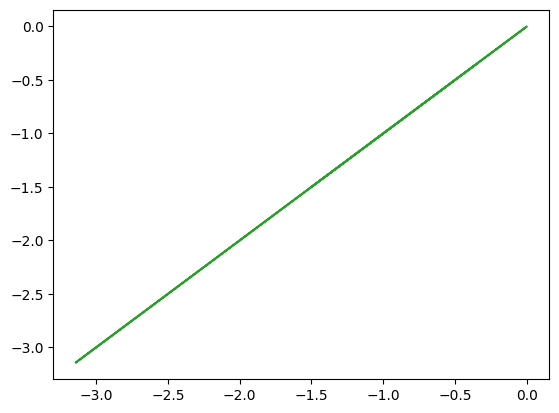

In [379]:
plt.plot(conformation1_rotation_angle.detach().numpy(), conformation1_rotation_angle.detach().numpy())

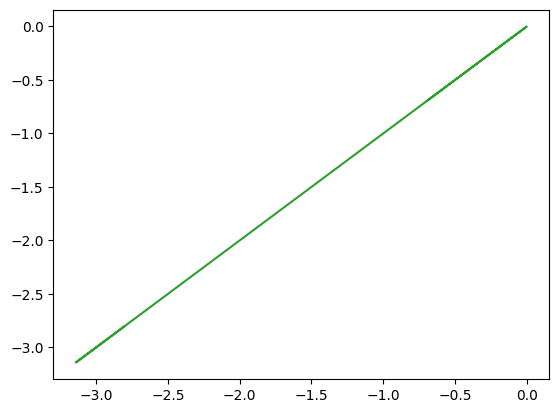

In [380]:
plt.plot(conformation2_rotation_angle.detach().numpy(), conformation2_rotation_angle.detach().numpy())

In [21]:
(2850/10)*18

5130.0

In [164]:
20*60+35

1235

In [165]:
5000/1235

4.048582995951417

In [168]:
4.04858*24*60

5829.9552

In [221]:
a = b = 5

In [224]:
b = 6

In [227]:
a = 7

In [230]:
print("coucou", a)

coucou 7


In [232]:
a = None

In [233]:
b = None

In [234]:
a == b

True

In [235]:
a is b

True

In [236]:
a = b = 0

In [237]:
a is b

True

In [238]:
b = 1

In [239]:
a is b

False

In [246]:
print(f"{3.17333333:.7}")

3.173333


In [249]:
exec(c=2)

TypeError: exec() takes no keyword arguments

# III. Deeper model

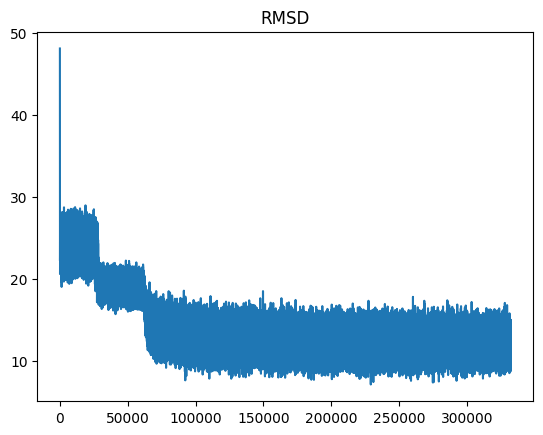

In [30]:
path = "/Users/gabdu45/PycharmProjects/segmentationCryoEM/data/imagesGMMRotationsPresentationDeeper/"
plot_loss(path + "losses_rmsd.npy", "RMSD")

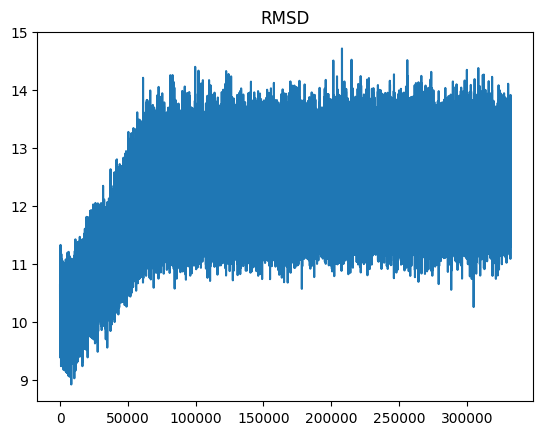

In [31]:
plot_loss(path + "losses_dkl.npy", "RMSD")

In [32]:
mask = np.load(path+"mask3306.npy")
b = np.argmax(mask, axis=1)
np.sum(b == 3)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/gabdu45/PycharmProjects/segmentationCryoEM/data/imagesGMMRotationsPresentationDeeper/mask3306.npy'

In [33]:
mask_evol = mask_evolution(path)

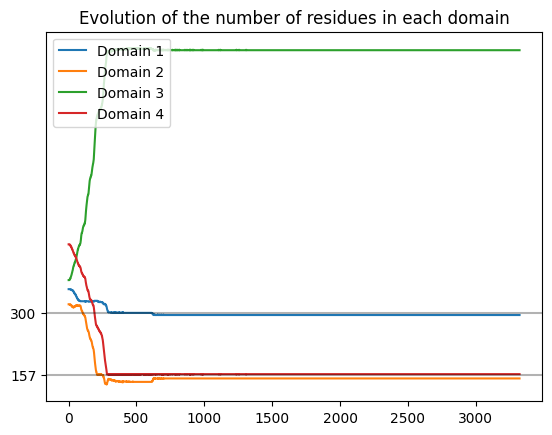

In [34]:
plt.plot(mask_evol[:, 0], label="Domain 1")
plt.plot(mask_evol[:, 1], label="Domain 2")
plt.plot(mask_evol[:, 2], label="Domain 3")
plt.plot(mask_evol[:, 3], label="Domain 4")
plt.axhline(y=157, alpha=0.3, color="black")
plt.axhline(y=300, alpha=0.3, color="black")
plt.yticks([157, 300])
plt.legend(loc="upper left")
plt.title("Evolution of the number of residues in each domain")
plt.show()

In [35]:
model = torch.load(path + "full_model3323", map_location=torch.device('cpu'))

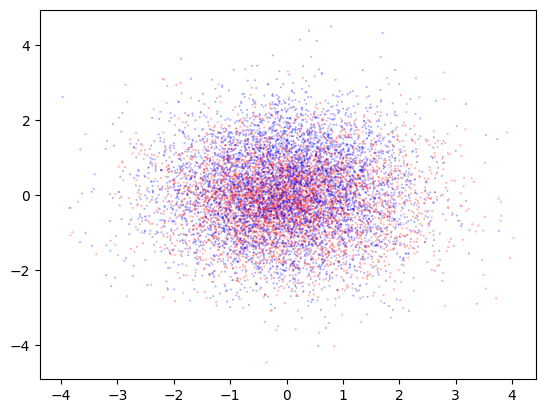

In [36]:
pca_latent = pca_latent_space(model)
colors = ["red" if i <5000 else "blue" for i in range(10000)]
plt.scatter(pca_latent[:, 0], pca_latent[:, 1], s =0.1, color=colors, alpha=0.5)

In [37]:
training_indexes = torch.tensor(np.array([i for i in range(10000)]))
training_axis = torch.load(path + "training_rotations_axis.npy", map_location=torch.device('cpu'))
training_angles = torch.load(path + "training_rotations_angles.npy", map_location=torch.device('cpu'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/gabdu45/PycharmProjects/segmentationCryoEM/data/imagesGMMRotationsPresentationDeeper/training_rotations_axis.npy'

In [18]:
model.device = "cpu"
model.batch_size = 5000
new_structure, predicted_translations, predicted_rotations = get_predicted_transformations(model, training_indexes[-5000:], training_angles[-5000:], training_axis
                                                                       [-5000:])

In [19]:
axis_angle_predicted = matrix_to_axis_angle(predicted_rotations[:, :, :, :])
angles_predicted = torch.sqrt(torch.sum(axis_angle_predicted**2, axis=-1))
axis_predicted = (axis_angle_predicted/angles_predicted[:, :, None])
predicted_rotations = predicted_rotations.detach().numpy()

In [20]:
pca = sklearn.decomposition.PCA()
pca_latent = pca.fit_transform(model.latent_mean.detach().numpy())

NameError: name 'sklearn' is not defined

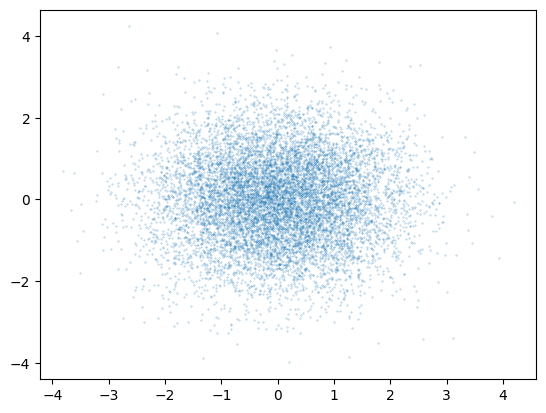

In [21]:
colors = ["red" if i <5000 else "blue" for i in range(10000)]
plt.scatter(pca_latent[:, 0], pca_latent[:, 1], s =0.1, alpha=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f88a298d540>,
 'caps': [<matplotlib.lines.Line2D at 0x7f88a298da80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f88a298d2a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f88a298dfc0>],
 'fliers': [],
 'means': []}

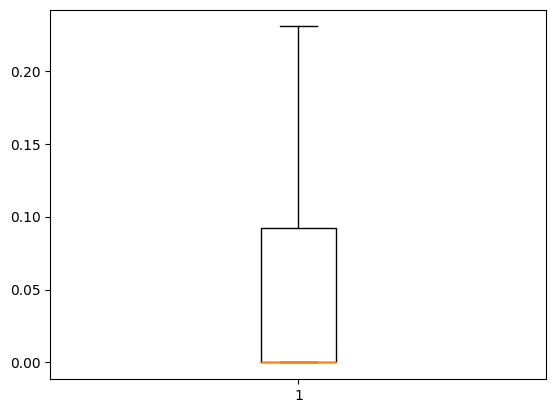

In [254]:
plt.boxplot(np.ndarray.flatten(torch.sum(predicted_translations[:, :, :]**2, dim=-1).detach().numpy()), showfliers=False)

In [255]:
norm = torch.sum(predicted_translations[:, :, :]**2, dim=-1)

In [256]:
np.mean((norm > 3).detach().numpy())

0.21925523178807946

In [257]:
norm[-3, :]

tensor([126.2197, 126.2197, 126.2197,  ...,  91.0259,  91.0259,  91.0259],
       grad_fn=<SliceBackward0>)

In [258]:
predicted_translations[-3, :, :]

tensor([[-8.0240, -7.8626, -0.1221],
        [-8.0240, -7.8626, -0.1221],
        [-8.0240, -7.8626, -0.1221],
        ...,
        [ 9.2673, -1.8997,  1.2384],
        [ 9.2673, -1.8997,  1.2384],
        [ 9.2673, -1.8997,  1.2384]], grad_fn=<SliceBackward0>)

In [264]:
np.pi/2

1.5707963267948966

In [265]:
predicted_translations[10, :, :]

tensor([[-7.8477e+00, -8.1761e+00,  4.1944e-03],
        [-7.8477e+00, -8.1761e+00,  4.1944e-03],
        [-7.8477e+00, -8.1761e+00,  4.1944e-03],
        ...,
        [ 8.9121e+00, -1.5888e+00,  1.4714e+00],
        [ 8.9121e+00, -1.5888e+00,  1.4714e+00],
        [ 8.9121e+00, -1.5888e+00,  1.4714e+00]], grad_fn=<SliceBackward0>)

In [266]:
np.pi/2

1.5707963267948966

In [267]:
new_structure.shape

torch.Size([5000, 4530, 3])

In [157]:
data_features = "data/features.npy"
features = np.load(data_features, allow_pickle=True)
features = features.item()
absolute_positions = torch.tensor(features["absolute_positions"] - np.mean(features["absolute_positions"], axis=0))

In [162]:
all_rmsd = torch.mean(torch.sum((new_structure - absolute_positions)**2, dim = -1), dim=-1)

In [163]:
torch.min(all_rmsd)

tensor(84.1373, grad_fn=<MinBackward1>)

In [164]:
torch.max(all_rmsd)

tensor(445.3343, grad_fn=<MaxBackward1>)

In [171]:
torch.argmin(all_rmsd)

tensor(571)

In [165]:
torch.argmax(all_rmsd)

tensor(511)

In [15]:
rotation_matrices = torch.load(path + "training_conformation_rotation_matrices.npy", map_location=torch.device('cpu'))
axis_angle = matrix_to_axis_angle(rotation_matrices)
angles = torch.sqrt(torch.sum(axis_angle**2, axis=-1))
axis = (axis_angle/angles[:, :, None])[:, 2, :]
rotation_matrices = rotation_matrices.detach().numpy()

In [22]:

n_struct = 8000
true_translations = np.zeros((1511, 3))
true_translations[:300, :2] = 0
translate_residues_pdb(path + "ranked_0.pdb", path + "predicted_conformation2/trueTransformed.pdb", true_translations)

rotate_domain_pdb(path + "predicted_conformation2/trueTransformed.pdb", 
              path + "predicted_conformation2/trueTransformed.pdb", model.cutoff2, 1511, 
             rotation_matrices[n_struct][2],model.local_frame_in_colums.detach().numpy())

rotate_domain_pdb(path + "predicted_conformation2/trueTransformed.pdb", 
              path + "predicted_conformation2/trueTransformed.pdb", 0, model.cutoff1, 
             rotation_matrices[n_struct][0],model.local_frame_in_colums.detach().numpy())


for n_struct in range(5000):
    if n_struct % 10 == 0:
        print("Structure number:", n_struct)
        
    transform_pdb(path + "ranked_0.pdb", 
                  path + "predicted_conformation2/predictedTransformed"+str(n_struct) +".pdb", 
                 predicted_rotations[n_struct],model.local_frame_in_colums.detach().numpy())


    translate_residues_pdb(path + "predicted_conformation2/predictedTransformed"+str(n_struct) +".pdb", path + "predicted_conformation1/predictedTransformed"+str(n_struct) +".pdb", 
                           predicted_translations[n_struct].detach().numpy())

Structure number: 0
Structure number: 10
Structure number: 20
Structure number: 30
Structure number: 40
Structure number: 50
Structure number: 60
Structure number: 70
Structure number: 80
Structure number: 90
Structure number: 100
Structure number: 110
Structure number: 120
Structure number: 130
Structure number: 140
Structure number: 150
Structure number: 160
Structure number: 170
Structure number: 180
Structure number: 190
Structure number: 200
Structure number: 210
Structure number: 220
Structure number: 230
Structure number: 240
Structure number: 250
Structure number: 260
Structure number: 270
Structure number: 280
Structure number: 290
Structure number: 300
Structure number: 310
Structure number: 320
Structure number: 330
Structure number: 340
Structure number: 350
Structure number: 360
Structure number: 370
Structure number: 380
Structure number: 390
Structure number: 400
Structure number: 410
Structure number: 420
Structure number: 430
Structure number: 440
Structure number: 450

KeyboardInterrupt: 

In [16]:
import os
from protein.main import compute_rmsd_pdb
all_rmsd = []
all_struct = []
paths_predicted =[s for s in os.listdir("data/imagesGMMRotationsPresentationDeeper/predicted_conformation1/") if "predictedTransformed" in s]
for i, path_predicted in enumerate(paths_predicted):
    n_struct = int(path_predicted.replace("predictedTransformed", "").replace(".pdb", ""))
    rmsd = compute_rmsd_pdb(path + "predicted_conformation1/trueTransformed.pdb", path + "predicted_conformation1/"+ path_predicted)
    all_rmsd.append(rmsd)
    all_struct.append(n_struct)
    print(i,n_struct, rmsd)
    
    

0 2077 535.1455
1 566 18.049807
2 200 18.058424
3 1218 18.044724
4 2711 17.987604
5 2705 18.320053
6 214 18.091757
7 572 18.194899
8 2063 18.206482
9 1542 18.259672
10 1224 18.275322
11 228 17.857113
12 1230 546.0879
13 2739 545.03284
14 1556 18.024086
15 2088 18.179827
16 1581 537.7925
17 599 18.294907
18 2936 17.92095
19 2922 18.377052
20 1595 18.06043
21 2513 546.7237
22 764 550.16016
23 2275 18.235554
24 2261 545.56586
25 770 17.96905
26 1768 564.5999
27 2507 18.139141
28 1026 535.2635
29 2249 18.11341
30 758 18.046127
31 1740 17.749765
32 980 18.231823
33 1998 17.596823
34 1754 18.308506
35 994 18.110315
36 1032 545.34406
37 1967 18.422932
38 1973 18.064568
39 943 547.2559
40 1783 18.19483
41 957 18.041664
42 1797 18.355425
43 2467 548.8045
44 176 18.21147
45 1608 18.352123
46 610 17.65642
47 2301 18.120377
48 2315 18.010029
49 604 18.359737
50 162 17.655235
51 2473 18.0512
52 1152 18.057951
53 73 544.8571
54 1634 17.97912
55 1620 18.210367
56 638 546.0465
57 2329 547.79016
58 114

454 2663 17.960775
455 2850 18.053555
456 2688 18.00229
457 399 18.580488
458 1381 18.057585
459 1395 18.25857
460 2844 18.206266
461 2878 18.075788
462 2879 545.1404
463 2845 18.054834
464 1394 18.16898
465 1380 18.017776
466 398 18.139545
467 2689 17.908346
468 2851 17.900372
469 415 18.37809
470 2104 17.820166
471 2662 18.197535
472 373 17.972853
473 367 545.65265
474 2676 545.8876
475 2110 18.112139
476 401 18.293343
477 1419 18.353075
478 2138 18.110332
479 429 18.15535
480 1431 18.271152
481 1357 17.832855
482 2886 441.94763
483 2892 17.73808
484 1343 18.250069
485 1425 18.16814
486 1814 549.3454
487 1800 545.50024
488 818 545.48517
489 1196 543.3909
490 1828 18.33091
491 830 18.619547
492 824 551.2873
493 1182 18.135618
494 48 18.09827
495 171 18.019737
496 1169 18.086866
497 2460 18.236317
498 2306 18.146364
499 617 18.252033
500 603 18.16277
501 2312 18.205456
502 2474 546.5976
503 165 546.14844
504 74 542.28625
505 1155 18.00024
506 1633 18.189318
507 1627 17.890167
508 60 18

902 1246 545.8809
903 538 18.210712
904 1520 547.29175
905 7 18.15784
906 2029 545.92914
907 510 18.447346
908 1508 17.963821
909 2001 545.76196
910 2767 545.7556
911 276 547.134
912 262 18.073217
913 2773 18.233778
914 2015 18.156992
915 504 545.4447
916 274 18.052557
917 2765 544.1333
918 2003 17.719542
919 512 18.736689
920 506 18.13356
921 2017 546.5395
922 2771 550.62256
923 260 18.111355
924 1278 18.11396
925 2759 183.03413
926 248 18.13287
927 1250 534.4049
928 1536 18.195621
929 5 18.198723
930 1522 18.147434
931 1244 17.95382
932 1293 18.252655
933 2942 18.316
934 1287 545.89954
935 710 18.226711
936 1708 18.048542
937 2201 17.844837
938 2567 532.96185
939 2573 18.230164
940 2215 543.8139
941 704 17.886232
942 1734 18.226458
943 1052 18.185028
944 1046 18.323292
945 738 17.945831
946 1720 547.3397
947 2229 594.9994
948 1913 17.963352
949 1907 546.8957
950 937 542.84546
951 2598 546.2011
952 1091 17.98932
953 1085 18.320423
954 923 17.81357
955 664 543.22766
956 2375 18.088308


1333 312 19.418886
1334 306 17.959534
1335 2617 18.063326
1336 2171 18.1444
1337 1478 18.179464
1338 460 17.680607
1339 1493 17.971031
1340 2824 18.066507
1341 2830 18.233618
1342 1487 547.1489
1343 2818 17.937447
1344 2819 78.48654
1345 2831 18.26925
1346 1486 17.80955
1347 1492 18.115242
1348 2825 546.4212
1349 2616 546.8147
1350 307 17.899025
1351 461 17.966415
1352 1479 17.764381
1353 2170 536.0842
1354 2164 18.151098
1355 475 18.15941
1356 313 18.055214
1357 2602 546.9452
1358 1323 18.162676
1359 1445 17.927414
1360 449 547.1431
1361 1451 544.9272
1362 2158 538.2103
1363 1337 17.850801
1364 1860 18.40705
1365 878 18.097805
1366 1874 17.983202
1367 844 53.84233
1368 1684 16.765083
1369 1848 17.962473
1370 850 18.482504
1371 1690 18.515615
1372 688 18.158777
1373 2399 18.13594
1374 2372 546.9374
1375 663 542.05304
1376 105 18.13965
1377 2414 18.087536
1378 2400 18.133291
1379 28 18.378199
1380 111 17.604399
1381 1109 546.555
1382 677 17.587776
1383 2366 18.048038
1384 1647 18.063522

1757 122 547.369
1758 903 546.8369
1759 917 545.9479
1760 2590 17.700806
1761 1099 18.370916
1762 1927 17.924063
1763 1933 17.994225
1764 2584 18.1015
1765 1066 18.318615
1766 1700 18.144
1767 718 18.138477
1768 2209 18.243418
1769 1714 18.084106
1770 1072 18.006681
1771 2553 17.825098
1772 2235 17.816479
1773 724 538.6121
1774 1728 18.178467
1775 730 546.79535
1776 2221 547.75073
1777 2547 18.423428
1778 283 18.19908
1779 2792 18.015099
1780 2786 18.196943
1781 297 18.084322
1782 1502 17.982527
1783 1264 18.052277
1784 2779 18.140265
1785 1270 545.5398
1786 268 18.445927
1787 1516 546.62555
1788 526 18.013086
1789 2037 18.109062
1790 2751 18.173395
1791 1258 18.04978
1792 240 18.316158
1793 254 18.013319
1794 2745 546.4506
1795 2023 18.112204
1796 532 18.457071
1797 1512 18.140394
1798 1274 546.3385
1799 2769 17.99887
1800 1260 17.924513
1801 278 18.096489
1802 1506 18.120913
1803 536 18.29205
1804 2027 543.1155
1805 9 544.497
1806 2741 18.049646
1807 1248 535.42535
1808 250 18.240519

2182 2903 17.872543
2183 2532 18.080997
2184 2254 428.2521
2185 745 515.902
2186 1985 18.049017
2187 751 545.9592
2188 1749 542.5961
2189 989 18.017706
2190 1991 18.105722
2191 2240 18.224731
2192 2526 18.02301
2193 1007 528.9011
2194 779 17.93235
2195 1761 542.81226
2196 2268 18.195065
2197 1775 538.14374
2198 1013 544.39886
2199 1946 18.237764
2200 786 18.40938
2201 2297 544.11804
2202 2283 18.002443
2203 1952 17.44979
2204 792 18.323116
2205 962 18.053915
2206 976 18.01339
2207 157 17.806
2208 2446 17.962223
2209 2320 18.090258
2210 1629 18.130835
2211 631 18.241926
2212 625 18.472345
2213 2334 17.92965
2214 2452 18.06196
2215 143 18.12886
2216 1173 18.152536
2217 52 18.317568
2218 1615 18.165018
2219 2308 18.175491
2220 1601 18.293028
2221 619 18.247826
2222 1167 548.8651
2223 46 18.369993
2224 2485 18.108837
2225 194 18.060553
2226 1832 546.2743
2227 1826 51.76334
2228 180 18.086498
2229 1198 18.58281
2230 2491 18.085703
2231 91 18.036427
2232 816 547.2363
2233 802 507.05524
2234 

2608 623 17.487123
2609 2332 513.01526
2610 2454 18.178692
2611 145 18.043756
2612 1149 546.9521
2613 151 17.898684
2614 68 545.8441
2615 2440 18.131443
2616 2326 18.135191
2617 637 547.51654
2618 804 543.5338
2619 83 544.98895
2620 97 18.259087
2621 810 18.073784
2622 1808 18.202095
2623 838 18.154848
2624 1820 544.17755
2625 186 547.6768
2626 2497 548.0649
2627 2483 545.0406
2628 192 551.25946
2629 1834 545.8763
2630 1363 546.17645
2631 1405 547.7706
2632 2118 17.198952
2633 1411 18.021595
2634 409 18.096727
2635 1377 18.2208
2636 347 545.7488
2637 2656 18.214338
2638 2130 18.142859
2639 1439 160.36421
2640 421 18.257395
2641 435 17.937008
2642 2124 573.36914
2643 2642 18.387514
2644 353 17.867466
2645 2871 543.24896
2646 2865 17.979532
2647 2695 547.29407
2648 384 17.86881
2649 390 18.866589
2650 1388 18.23209
2651 2859 18.033176
2652 2681 17.400858
2653 2680 547.0026
2654 2858 341.63696
2655 1389 18.620201
2656 391 18.585333
2657 385 18.078636
2658 2694 18.179163
2659 2864 18.14396

In [17]:
list(sorted(zip(all_rmsd, all_struct)))[:]

[(16.433474, 905),
 (16.436192, 531),
 (16.546616, 828),
 (16.765083, 1684),
 (16.840096, 26),
 (16.940275, 499),
 (16.991983, 2896),
 (17.198952, 2118),
 (17.200785, 1228),
 (17.212322, 2453),
 (17.214441, 563),
 (17.220554, 63),
 (17.293533, 2709),
 (17.313515, 1107),
 (17.328543, 1352),
 (17.359974, 1103),
 (17.362522, 2780),
 (17.386015, 2603),
 (17.39743, 403),
 (17.400858, 2681),
 (17.4018, 341),
 (17.438625, 1605),
 (17.446188, 1704),
 (17.44979, 1952),
 (17.462286, 1399),
 (17.487123, 623),
 (17.492416, 2579),
 (17.501076, 2226),
 (17.502113, 2940),
 (17.5023, 252),
 (17.522738, 1841),
 (17.538303, 381),
 (17.556328, 1261),
 (17.571783, 697),
 (17.578741, 2578),
 (17.58217, 874),
 (17.58465, 2712),
 (17.587776, 677),
 (17.59116, 126),
 (17.596823, 1998),
 (17.604399, 111),
 (17.606506, 1518),
 (17.624641, 2339),
 (17.651993, 902),
 (17.652466, 2398),
 (17.655235, 162),
 (17.65642, 610),
 (17.659576, 2778),
 (17.678698, 2246),
 (17.678974, 2754),
 (17.680607, 460),
 (17.690218, 

In [23]:
import os
from protein.main import compute_rmsd_pdb
all_rmsd_conf2 = []
all_struct_conf2 = []
paths_predicted =[s for s in os.listdir("data/imagesGMMRotationsPresentationDeeper/predicted_conformation2/") if "predictedTransformed" in s]
for i, path_predicted in enumerate(paths_predicted):
    n_struct = int(path_predicted.replace("predictedTransformed", "").replace(".pdb", ""))
    rmsd = compute_rmsd_pdb(path + "predicted_conformation2/trueTransformed.pdb", path + "predicted_conformation2/"+ path_predicted)
    all_rmsd_conf2.append(rmsd)
    all_struct_conf2.append(n_struct)
    print(i,n_struct, rmsd)
    

0 2077 0.059170682
1 566 0.06966081
2 200 0.061278142
3 1218 0.0639188
4 214 0.07491133
5 572 0.066475525
6 2063 0.0931446
7 1542 0.059808247
8 1224 0.070691645
9 228 437.39783
10 1230 0.123373985
11 1556 0.060443398
12 2088 0.06318723
13 1581 0.06081069
14 599 435.61603
15 1595 0.062420834
16 764 0.061613902
17 770 0.07409111
18 1768 0.063557096
19 1026 0.059587765
20 758 0.10074503
21 1740 438.46564
22 980 437.9794
23 1998 0.083680555
24 1754 0.080826305
25 994 0.09517384
26 1032 0.061455477
27 1967 0.123578764
28 1973 0.062430844
29 943 0.06953967
30 1783 0.07426131
31 957 0.065013364
32 1797 363.74802
33 176 0.062091175
34 1608 0.07206537
35 610 0.072641455
36 604 438.26968
37 162 0.065691374
38 1152 0.06591298
39 73 0.11498551
40 1634 0.0787631
41 1620 0.09348653
42 638 404.0658
43 1146 0.058930747
44 67 436.3603
45 1813 0.062373504
46 1807 437.45996
47 98 436.74933
48 189 0.06920194
49 1191 0.07275466
50 837 0.107214525
51 823 0.060273968
52 1185 0.06732335
53 2103 437.2697
54 41

427 588 0.058535747
428 1590 0.059811633
429 2099 0.061507493
430 1745 0.08908672
431 985 0.070815116
432 1023 0.078638986
433 1037 0.074264936
434 1751 438.92834
435 749 0.0633605
436 1989 436.4786
437 991 0.065959565
438 1779 0.06229717
439 761 0.06811681
440 775 0.09957182
441 946 0.06037356
442 1786 0.06373713
443 952 0.061175458
444 1792 0.07617751
445 1962 0.058581464
446 1976 0.07197387
447 629 0.06184716
448 1631 0.06499433
449 1157 0.069568515
450 76 0.06316613
451 1143 0.20303519
452 62 0.061329223
453 1625 436.145
454 615 0.078717716
455 173 438.317
456 167 0.06358817
457 601 439.27756
458 1619 0.061977178
459 832 0.05903579
460 1194 0.06114817
461 1180 0.063759916
462 198 15.23955
463 826 0.06465719
464 1816 64.5864
465 89 0.09241264
466 1802 0.06767923
467 1355 0.06398969
468 1433 430.84753
469 1427 0.060717743
470 359 381.4718
471 1341 40.041607
472 371 438.63635
473 1369 0.08198418
474 2106 0.061827403
475 417 0.062674135
476 403 0.09850939
477 2112 437.4235
478 365 439.

850 891 0.08962067
851 1889 0.060978796
852 649 0.086874194
853 1651 0.15837163
854 1137 0.114039004
855 16 0.06411115
856 107 0.061155897
857 661 0.06377303
858 1679 0.06385627
859 675 439.04068
860 113 435.53262
861 1686 0.063917845
862 846 0.060766123
863 1692 0.06701901
864 852 0.06696073
865 1862 0.062882975
866 1876 0.20809478
867 1447 0.06509763
868 339 0.06197603
869 1321 0.0716127
870 1335 412.7733
871 1453 0.063896
872 2172 0.075235486
873 463 0.06807281
874 305 0.06340673
875 311 0.06432518
876 1309 439.3757
877 477 438.7791
878 2166 0.28279427
879 1484 0.06370628
880 1490 440.4053
881 488 0.11769633
882 489 0.06371448
883 1491 440.1239
884 1485 0.06127249
885 1308 0.07305266
886 310 0.06360448
887 2167 0.061383992
888 476 0.09050826
889 462 439.5803
890 2173 0.065424435
891 304 438.26434
892 1334 0.06180538
893 1452 0.066247106
894 1446 0.06460004
895 1320 0.065731086
896 338 0.06339012
897 1877 0.07010727
898 1863 0.063885815
899 853 0.09629885
900 1693 0.062912524
901 847

1258 889 0.061406925
1259 1649 0.06125969
1260 651 0.06471566
1261 1661 0.061135545
1262 679 0.060242943
1263 1107 0.07001235
1264 26 0.061413407
1265 1113 0.08927616
1266 32 439.68924
1267 1675 0.061498646
1268 686 0.06473616
1269 1846 0.06431524
1270 692 0.10224974
1271 1852 0.06419846
1272 862 0.07206352
1273 876 0.0649476
1274 1339 0.06084919
1275 321 0.06584926
1276 447 0.06479661
1277 2156 0.07593071
1278 2142 0.07510429
1279 453 0.06979087
1280 335 0.10868833
1281 1305 0.06625157
1282 1463 0.08456555
1283 1477 0.06271946
1284 1311 0.08146288
1285 309 435.16428
1286 2195 438.08267
1287 484 0.061809536
1288 490 0.09897251
1289 1488 440.54636
1290 2181 0.08182789
1291 2180 0.09072277
1292 1489 0.086617365
1293 491 0.060061757
1294 485 0.0669066
1295 2194 0.10543979
1296 1476 439.78262
1297 308 0.08100624
1298 1310 436.61136
1299 1304 430.38416
1300 1462 437.88843
1301 452 0.067192286
1302 2143 0.06252459
1303 334 0.07942489
1304 320 435.02905
1305 1338 0.075867474
1306 2157 0.09014

1659 976 0.060144883
1660 157 0.06064917
1661 1629 0.07953411
1662 631 0.06640623
1663 625 0.09256378
1664 143 436.8747
1665 1173 0.06848931
1666 52 0.05834091
1667 1615 0.0645062
1668 1601 0.06539969
1669 619 0.099427626
1670 1167 0.064702876
1671 46 0.09565773
1672 194 0.07533514
1673 1832 0.07252295
1674 1826 0.06922157
1675 180 0.06005418
1676 1198 0.08610442
1677 91 0.11594187
1678 816 0.05923225
1679 802 0.07746
1680 85 438.79706
1681 433 0.062665105
1682 2122 0.06724149
1683 355 0.067150705
1684 1359 0.06359269
1685 341 0.061935518
1686 2136 0.062034186
1687 427 0.07477714
1688 1417 436.95392
1689 1371 0.06272065
1690 369 0.14619383
1691 1365 0.067975044
1692 1403 438.75006
1693 396 0.06134068
1694 382 0.06303423
1695 383 0.05846456
1696 397 0.06339673
1697 1364 0.060704112
1698 1402 424.47348
1699 1416 0.06170835
1700 368 0.06365245
1701 1370 0.06031724
1702 340 0.09439227
1703 1358 439.13797
1704 426 0.059397236
1705 2137 0.071224175
1706 2123 0.06937267
1707 432 0.077911034
1

2061 218 437.5004
2062 1566 0.07436896
2063 1572 0.063487664
2064 1214 417.19617
2065 224 0.088708505
2066 542 0.06059675
2067 2053 0.06286588
2068 2047 0.45257235
2069 556 0.120799325
2070 1228 0.061889112
2071 230 0.10281158
2072 2090 438.4299
2073 581 0.0662861
2074 1599 0.07178073
2075 595 437.3443
2076 2084 0.06834577
2077 1764 0.08112492
2078 1002 0.072370596
2079 1016 0.08030057
2080 1770 437.07712
2081 768 0.063392766
2082 1758 0.068891294
2083 740 0.059990842
2084 1980 0.06475057
2085 998 0.0628186
2086 754 0.062294044
2087 1994 0.07095899
2088 967 0.07676029
2089 973 0.060415722
2090 1943 0.06014744
2091 783 0.08125103
2092 1957 0.065958515
2093 797 0.061728816
2094 608 0.06245551
2095 1610 0.13421187
2096 1176 0.064516544
2097 57 0.05982286
2098 1162 0.09095126
2099 43 0.060616814
2100 1604 0.06428173
2101 634 0.06629035
2102 152 0.08088706
2103 146 1.4398805
2104 620 0.07424927
2105 1638 0.058995698
2106 813 0.061760187
2107 94 437.5116
2108 80 0.061204907
2109 807 0.064463

In [219]:
predicted_rotations[571][-157:]

array([[[ 9.9985677e-01,  1.0924937e-03, -1.6888311e-02],
        [-1.0966291e-03,  9.9999934e-01, -2.3562281e-04],
        [ 1.6888043e-02,  2.5410933e-04,  9.9985737e-01]],

       [[ 9.9929839e-01,  8.2770392e-04, -3.7443697e-02],
        [-7.9937419e-04,  9.9999934e-01,  7.7156012e-04],
        [ 3.7444312e-02, -7.4108713e-04,  9.9929845e-01]],

       [[ 9.9654692e-01,  3.1435711e-04, -8.3030723e-02],
        [-6.6589448e-05,  9.9999553e-01,  2.9867995e-03],
        [ 8.3031297e-02, -2.9709567e-03,  9.9654251e-01]],

       ...,

       [[ 1.5091169e-01,  2.9186385e-02, -9.8811626e-01],
        [ 5.3296961e-02,  9.9787003e-01,  3.7614349e-02],
        [ 9.8710942e-01, -5.8340043e-02,  1.4903468e-01]],

       [[ 1.5091169e-01,  2.9186385e-02, -9.8811626e-01],
        [ 5.3296961e-02,  9.9787003e-01,  3.7614349e-02],
        [ 9.8710942e-01, -5.8340043e-02,  1.4903468e-01]],

       [[ 1.5091169e-01,  2.9186385e-02, -9.8811626e-01],
        [ 5.3296961e-02,  9.9787003e-01,  3.76143

In [229]:
axis_predicted[4]

tensor([[ 1.2881e-04,  3.4134e-03, -9.9999e-01],
        [ 1.2881e-04,  3.4134e-03, -9.9999e-01],
        [ 1.2881e-04,  3.4134e-03, -9.9999e-01],
        ...,
        [-4.3547e-01, -8.9950e-01,  3.5632e-02],
        [-4.3547e-01, -8.9950e-01,  3.5632e-02],
        [-4.3547e-01, -8.9950e-01,  3.5632e-02]], grad_fn=<SelectBackward0>)

In [228]:
angles_predicted[4]

tensor([0.7852, 0.7852, 0.7852,  ..., 1.6203, 1.6203, 1.6203],
       grad_fn=<SelectBackward0>)

In [223]:
np.pi/2

1.5707963267948966

In [202]:
help(translate_residues_pdb)

Help on function translate_residues_pdb in module __main__:

translate_residues_pdb(path_in, path_out, translations)



In [209]:
rotation_matrices[571][0]

array([[ 0.7071067,  0.7071068,  0.       ],
       [-0.7071068,  0.7071067,  0.       ],
       [ 0.       ,  0.       ,  1.       ]], dtype=float32)

In [174]:
predicted_rotations[571]

array([[[ 9.9814528e-01,  5.4716904e-02, -2.6683601e-02],
        [-5.4708365e-02,  9.9850184e-01,  1.0504490e-03],
        [ 2.6701102e-02,  4.1131544e-04,  9.9964339e-01]],

       [[ 9.9814528e-01,  5.4716904e-02, -2.6683601e-02],
        [-5.4708365e-02,  9.9850184e-01,  1.0504490e-03],
        [ 2.6701102e-02,  4.1131544e-04,  9.9964339e-01]],

       [[ 9.9814528e-01,  5.4716904e-02, -2.6683601e-02],
        [-5.4708365e-02,  9.9850184e-01,  1.0504490e-03],
        [ 2.6701102e-02,  4.1131544e-04,  9.9964339e-01]],

       ...,

       [[ 1.5091169e-01,  2.9186385e-02, -9.8811626e-01],
        [ 5.3296961e-02,  9.9787003e-01,  3.7614349e-02],
        [ 9.8710942e-01, -5.8340043e-02,  1.4903468e-01]],

       [[ 1.5091169e-01,  2.9186385e-02, -9.8811626e-01],
        [ 5.3296961e-02,  9.9787003e-01,  3.7614349e-02],
        [ 9.8710942e-01, -5.8340043e-02,  1.4903468e-01]],

       [[ 1.5091169e-01,  2.9186385e-02, -9.8811626e-01],
        [ 5.3296961e-02,  9.9787003e-01,  3.76143

In [201]:
help(translate_residues_pdb)

Help on function translate_residues_pdb in module __main__:

translate_residues_pdb(path_in, path_out, translations)



In [181]:
np.pi/2

1.5707963267948966

In [184]:
predicted_translations[571,-157:, :]

tensor([[-1.8747e-02,  5.6088e-03,  1.0954e-02],
        [-1.3041e-02, -1.0925e-03,  9.0231e-03],
        [-3.6590e-04, -1.5977e-02,  4.7347e-03],
        [ 2.6150e-02, -4.7115e-02, -4.2367e-03],
        [ 7.5310e-02, -1.0485e-01, -2.0869e-02],
        [ 1.4894e-01, -1.9131e-01, -4.5781e-02],
        [ 2.3032e-01, -2.8687e-01, -7.3315e-02],
        [ 2.9490e-01, -3.6272e-01, -9.5166e-02],
        [ 3.3400e-01, -4.0863e-01, -1.0839e-01],
        [ 3.5392e-01, -4.3203e-01, -1.1514e-01],
        [ 3.6319e-01, -4.4291e-01, -1.1827e-01],
        [ 3.6732e-01, -4.4776e-01, -1.1967e-01],
        [ 3.6913e-01, -4.4988e-01, -1.2028e-01],
        [ 3.6991e-01, -4.5080e-01, -1.2054e-01],
        [ 3.7025e-01, -4.5120e-01, -1.2066e-01],
        [ 3.7039e-01, -4.5137e-01, -1.2071e-01],
        [ 3.7046e-01, -4.5144e-01, -1.2073e-01],
        [ 3.7048e-01, -4.5148e-01, -1.2074e-01],
        [ 3.7050e-01, -4.5149e-01, -1.2074e-01],
        [ 3.7050e-01, -4.5150e-01, -1.2074e-01],
        [ 3.7050e-01

In [187]:
help(translate_residues)

Help on function translate_residues in module protein.main:

translate_residues(pdb_structure, translations)
    Translate the residues with the corresponding translation vector
    :param pdb_structure: pdb structure in biopython
    :param translations: np array (N_residue,3) of rotation matrices per residue



In [198]:
predicted_translations[571]

tensor([[-2.2676, -1.4367,  0.0961],
        [-2.2676, -1.4367,  0.0961],
        [-2.2676, -1.4367,  0.0961],
        ...,
        [ 0.3705, -0.4515, -0.1207],
        [ 0.3705, -0.4515, -0.1207],
        [ 0.3705, -0.4515, -0.1207]], grad_fn=<SelectBackward0>)

In [27]:
t = np.load("data/losses_rmsdNew.npy")

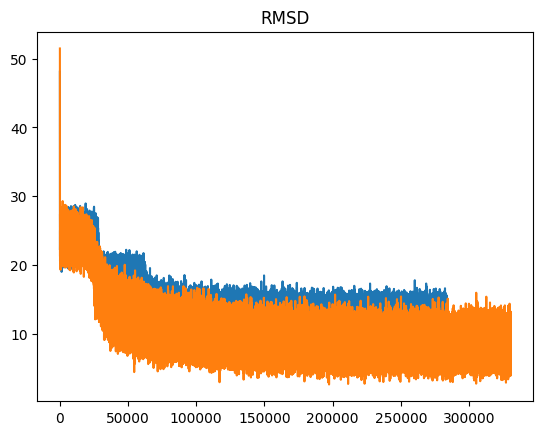

In [29]:
plt.plot(t)
path = "/Users/gabdu45/PycharmProjects/segmentationCryoEM/data/imagesGMMRotationsPresentationDeeper/"
plot_loss(path + "losses_rmsd.npy", "RMSD")

In [26]:
ls

1v2.png
1v4.png
1v6.png
1v7.png
1v9.png
4v7.png
MPNN.py
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
Untitled4.ipynb
__pycache__/
createGraph.py
create_data_set.py
data/
dataset.yaml
deform.py
environment.yml
full_model
imageRenderer.py
latentForces.npy
latentForces_dkl.npy
latentForces_rmsd.npy
losses_dkl.npy
losses_dkl_rotations1Domain.npy
losses_latentForces.npy
losses_mask.npy
losses_rmsd.npy
losses_rmsd_following.npy
losses_rmsd_followingAgain.npy
losses_rotations.npy
losses_rotations100000.npy
losses_rotations1Domain.npy
losses_rotations1Domain10000.npy
losses_rotationsPresentation.npy
losses_rotationsPresentationContinuous.npy
losses_train.npy
main.py
mask3464.npy
mask3582.npy
mask3940.npy
mask4229.npy
mask4848.npy
mlp.py
model
network.py
new_loss_rmsd_rotations.npy
new_loss_rmsd_rotations_good.npy
new_loss_rmsd_rotations_goodRotation.npy
new_loss_rmsd_rotations_goodlr01.npy
new_losses_rmsd
new_losses_rmsd.npy
old_losses_rmsd.npy
ranked_0.pdb
ranked_0_helixTrim

In [66]:
path = "/Users/gabdu45/PycharmProjects/segmentationCryoEM/data/imagesGMMRotationsPresentationContinuousLatentMask/"

In [68]:
mask_evol = mask_evolution(path)

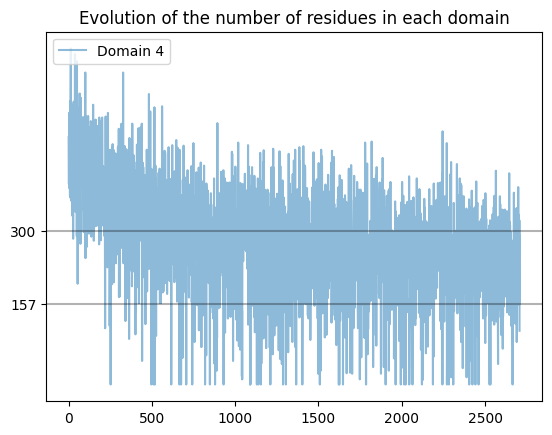

In [79]:
#plt.plot(mask_evol[:, 0], label="Domain 1", alpha=0.5)
#plt.plot(mask_evol[:, 1], label="Domain 2", alpha=0.5)
#plt.plot(mask_evol[:, 2], label="Domain 3", alpha=0.5)
plt.plot(mask_evol[:, 3], label="Domain 4", alpha=0.5)
plt.axhline(y=157, alpha=0.3, color="black")
plt.axhline(y=300, alpha=0.3, color="black")
plt.yticks([157, 300])
plt.legend(loc="upper left")
plt.title("Evolution of the number of residues in each domain")
plt.show()

In [80]:
model = torch.load(path + "/full_model", map_location=torch.device('cpu'))

In [82]:
model.cluster_means_mean

Parameter containing:
tensor([[ 167.2314,  555.5022,  807.1150, 1322.4609]], requires_grad=True)

In [83]:
[160, 550, 800, 1300]

[160, 550, 800, 1300]

In [84]:
model.cluster_means_std

Parameter containing:
tensor([[ 91.9948, 103.1678,  73.6234,  94.2638]], requires_grad=True)

In [85]:
model.cluster_std_mean

Parameter containing:
tensor([[101.8894, 102.1073, 105.4194, 102.8047]], requires_grad=True)

In [86]:
model.cluster_std_std

Parameter containing:
tensor([[ 9.6818, 10.9966,  2.2350,  7.9660]], requires_grad=True)

In [87]:
model.cluster_proportions_mean

Parameter containing:
tensor([[ 0.7001,  0.5266,  4.7549, -5.0891]], requires_grad=True)

In [88]:
model.cluster_proportions_std

Parameter containing:
tensor([[0.8511, 0.8311, 0.1726, 0.1854]], requires_grad=True)